# INSY695-078 Final Project: Analysis of Hotel Booking Cancellations

End to end project using Predictive Modeling and Causal Inference for Hotel Booking Cancellation Insights

# PART 1: DATA EXPLORATION

# Import the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Dataset

In [2]:
data = pd.read_csv('hotel_booking.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Getting an overview of Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Key points about the dataset structure are:

- Data Types: The DataFrame contains a mix of data types including integers, floating-point numbers, objects, and a datetime column.
- Non-Null Counts: All columns have nearly complete data with 119,390 non-null entries, except for 'children', 'country', 'agent', 'company', and 'days_in_waiting_list', which have fewer non-null values indicating the presence of missing data.
- Columns of Interest:
  - 'is_canceled': A binary integer column indicating if a booking was canceled.
  - 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month': Integer columns related to the timing of the bookings.
  - 'stays_in_weekend_nights', 'stays_in_week_nights': Integer columns indicating the length of stay.
  - 'adults', 'children', 'babies': Floating-point columns indicating the number of people in each booking.
  - 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type': Object columns representing categorical data.
  - 'reservation_status_date': A datetime column detailing when the reservation status was last updated.

# Summary Statistics

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Numeric Variables:

The data reveals the typical booking patterns, durations, and guest demographics, as well as highlighting areas with high variability such as lead time and ADR, which may require further investigation to understand the underlying causes.

- Cancellations: Around 37% of bookings are canceled.
- Lead Time: On average, bookings are made 104 days in advance, but there's significant variability (std of ~106 days), with some bookings made more than two years in advance (max 737 days).
- Arrival Date: The bookings span from the year 2015 to 2017, with most arrivals around the 27th week and the middle of the month.
- Stay Duration: Guests typically stay for about 2.5 weekdays and 0.9 weekend nights. However, some stays are as long as 50 nights.
- Guest Composition: Most bookings are for adults (mean slightly less than 2), with few children or babies.
- Repeat Guests: Only 3.9% of bookings are from repeat guests.
- Cancellations and Previous Bookings: Previous cancellations and non-canceled bookings are relatively low on average, but there are outliers with as many as 26 previous cancellations and 72 previous bookings not canceled.
- Booking Changes: Changes are made to around 22% of bookings.
- Agent/Company Bookings: The involvement of travel agents or companies is significant, with a wide range in the number of bookings handled by different agents/companies.
- Waiting Time: The average days on the waiting list are low, but can go up to 391 days.
- Average Daily Rate (ADR): The average price per night is about $101, with a wide range from negative values (possibly due to refunds or errors) to $5400.
- Car Parking: Very few bookings require parking spaces, but there can be up to 8 spaces required.
- Special Requests: There's an average of 0.57 special requests per booking, with a maximum of 5 requests.

In [5]:
# Get the summary statistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Categorical Variables:

This summary provides a high-level understanding of the booking characteristics, customer demographics, and operational specifics such as reservation outcomes and payment methods.

- The dataset contains 119,390 entries and covers two types of hotels, with 'City Hotel' being more common.
- Guests arrive throughout the year, with August being the most common arrival month.
- The 'BB' (Bed & Breakfast) is the most frequent meal type chosen.
- Guests come from 177 different countries, predominantly from Portugal (PRT).
- The 'Online TA' (Travel Agent) is the most common market segment, while the 'TA/TO' (Travel Agent/Tour Operator) is the top distribution channel.
- Room type 'A' is both the most frequently reserved and assigned room type.
- Most bookings do not require a deposit.
- The majority of customers are classified as 'Transient'.
- Most reservations end with the status 'Check-Out', implying the stay was completed.
- The most common date for updating reservation status is October 21, 2015.
- The dataset includes a wide variety of names and email addresses, with 'Michael Johnson' and 'Michael.C@gmail.com' appearing most frequently.
- Each phone number in the dataset is unique.
- There are 9,000 unique credit card numbers used for bookings, with the last four digits '4923' appearing most frequently.

# Plotting Data Distribution

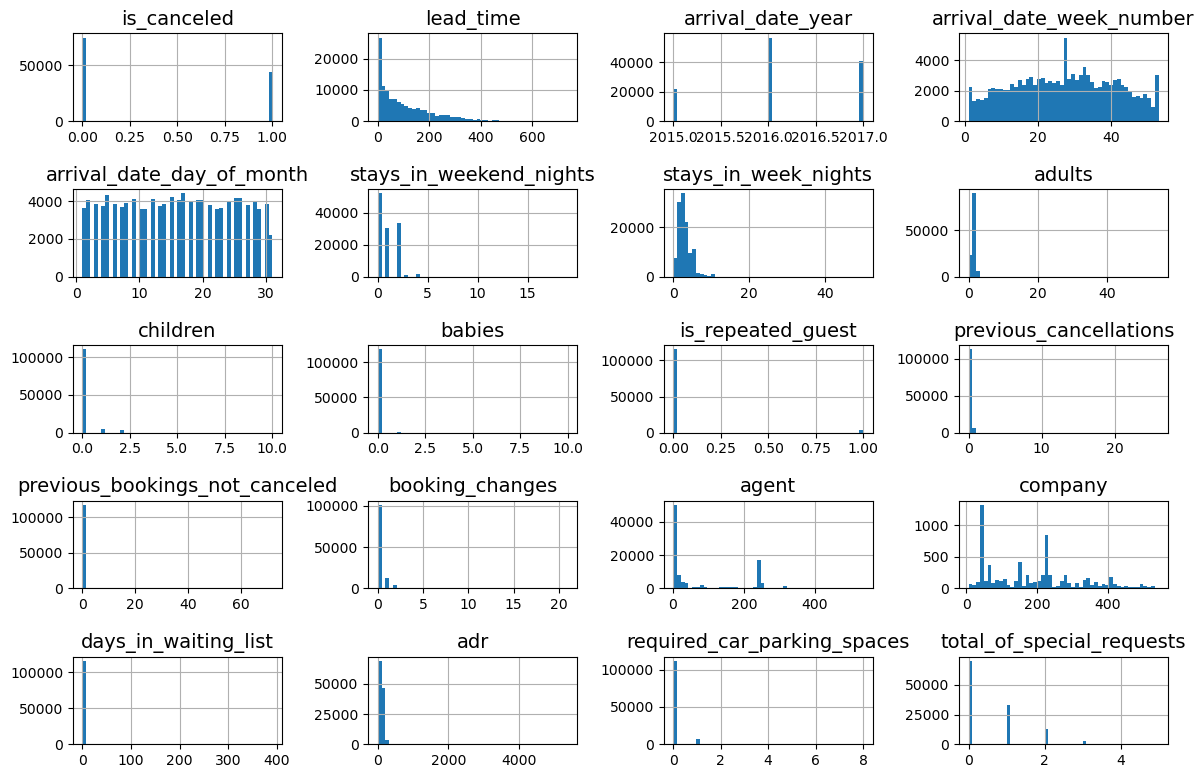

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()  # This will adjust the subplots to fit into the figure area.
plt.show()

### Based on the plot, we can infer the following about the data distribution:

1. is_canceled: There are fewer cancellations than non-cancellations.

2. lead_time: The distribution is right-skewed, meaning most bookings are made with fewer days in advance, but there are some bookings made with a very long lead time.

3. arrival_date_year: There are bars for perhaps three or four years, with one year having significantly more bookings than others.

4. arrival_date_week_number: Bookings appear to be somewhat evenly distributed throughout the year with slight increases, potentially indicating seasonal trends.

5. arrival_date_day_of_month: This distribution is relatively uniform, suggesting bookings occur throughout the month without significant day-to-day variation.

6. stays_in_weekend_nights and stays_in_week_nights: Both variables are right-skewed, indicating most stays are short, with fewer instances of longer stays.

7. adults: Most bookings are for one or two adults, with very few bookings for larger groups.

8. children and babies: The vast majority of bookings do not include children or babies, showing very low frequencies for bookings with one or more children/babies.

9. is_repeated_guest: A small proportion of bookings are from repeated guests.

10. previous_cancellations and previous_bookings_not_canceled: Both are heavily right-skewed, with most guests having no previous cancellations or bookings.

11. booking_changes: Most bookings have no changes, with a sharp drop-off as the number of changes increases.

12. agent and company: These histograms are likely showing IDs for travel agents or companies associated with the bookings. There are a few with high frequencies, suggesting some agents/companies book more frequently than others.

13. days_in_waiting_list: Almost all bookings have zero days on the waiting list, with very few having to wait one or more days.

14. adr (Average Daily Rate): The distribution is right-skewed with a peak at the lower end of the ADR, suggesting most bookings are at a lower price range with fewer high-priced bookings.

15. required_car_parking_spaces: Nearly all bookings require no car parking spaces.

16. total_of_special_requests: Most bookings have zero special requests, with a decreasing frequency as the number of requests increases.

# Count of Hotel Reservations by Reservation Status

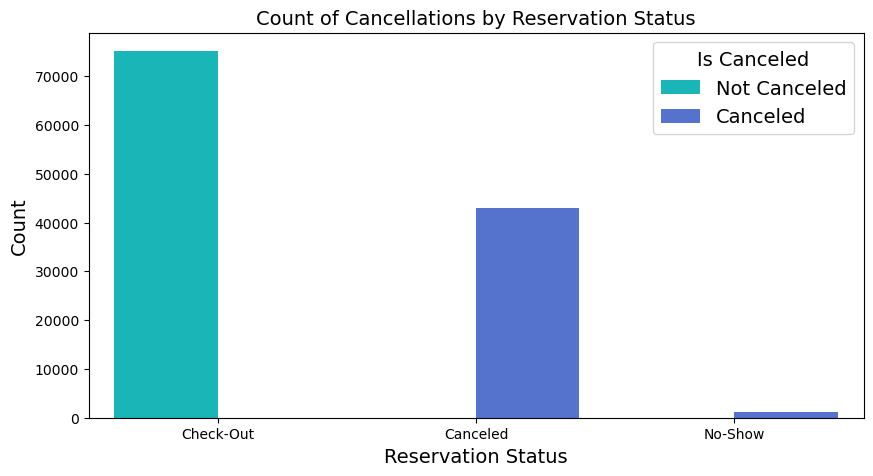

In [7]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=data, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

#### Based the chart, a large number of reservations resulted in actual stays (check-out), and these were not canceled.There is a significant count of reservations that were canceled, indicating that these bookings did not result in a stay. A smaller number of reservations were classified as no-shows, where the guest did not arrive and did not formally cancel the booking.

#### This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

# Grouping 'Canceled' and 'No-Show' as 'Canceled' and 'Check-Out' as 'Not Canceled' 

In [8]:
data.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

reservation_status_date is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

If a booking was canceled, the reservation_status_date would be the date on which the booking was canceled, implying that is_canceled should be 1.
On the other hand, if a booking was not canceled, the reservation_status_date would reflect the date of check-out, implying that is_canceled should be 0.
Therefore, the reservation_status_date can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

However,we can extract some useful information from it.The reservation_status_date column is a date variable that represents the date of the last reservation status. Since it is a date, it will likely be in a 'YYYY-MM-DD' format. We can calculate a new column:

Days_Difference: Calculate the difference in days between the reservation_status_date and the arrival_date to create a new feature representing the number of days between the last reservation status and the arrival dat

In [9]:
# Convert 'reservation_status_date' to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
data['reservation_status_days_difference'] = (data['reservation_status_date'] - pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str))).dt.days

data[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


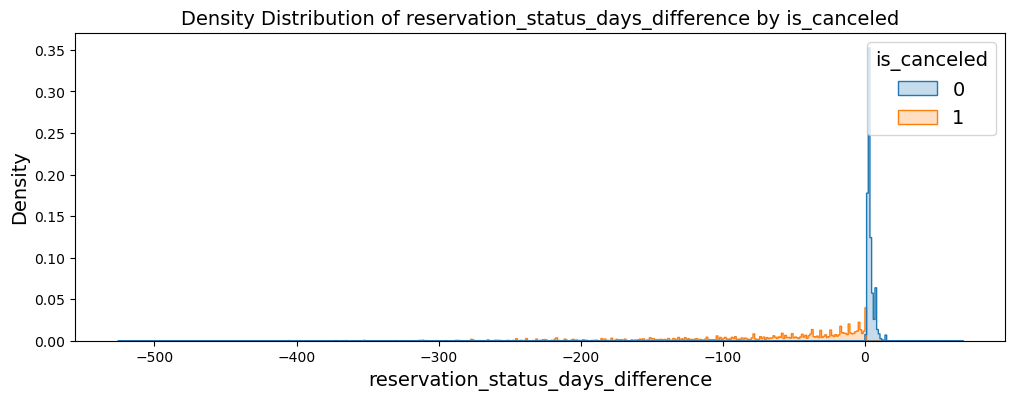

In [10]:
plt.figure(figsize=(12, 4))
sns.histplot(data=data, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [11]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(data[data['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(data[data['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    74460
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    42137
Name: count, dtype: int64


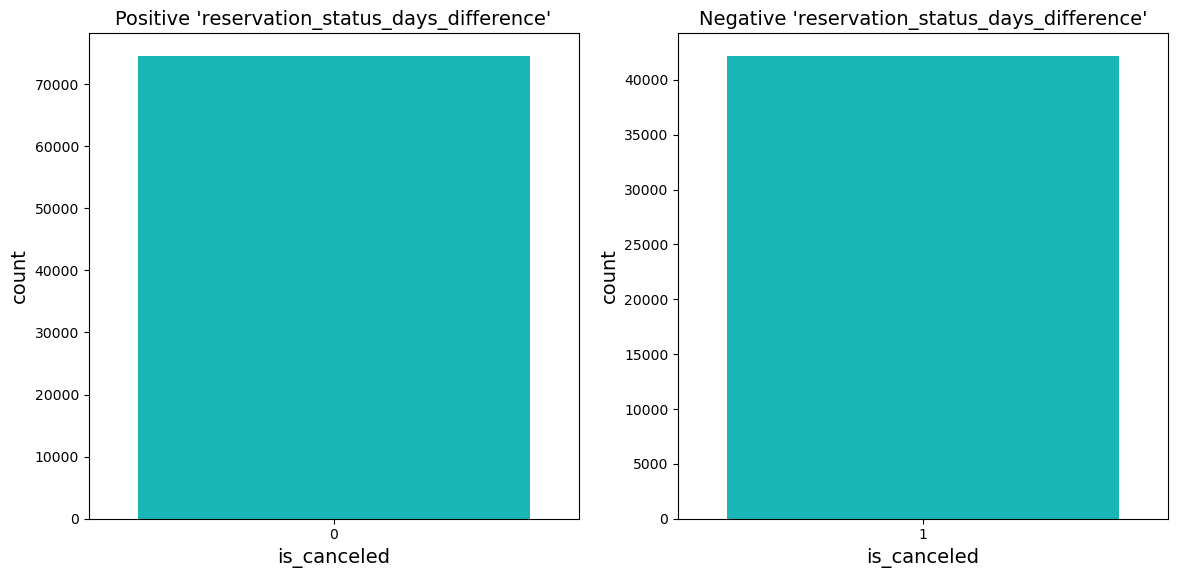

In [12]:
# Filter data into two DataFrames based on the condition
positive_diff = data[data['reservation_status_days_difference'] > 0]
negative_diff = data[data['reservation_status_days_difference'] < 0]

# Prepare the data for plotting
data_to_plot = [
    {'data': positive_diff, 'title': "Positive 'reservation_status_days_difference'"},
    {'data': negative_diff, 'title': "Negative 'reservation_status_days_difference'"}
]

# Plotting
plt.figure(figsize=(12, 6))

for i, item in enumerate(data_to_plot, start=1):
    plt.subplot(1, 2, i)
    sns.countplot(x='is_canceled', data=item['data'],palette=['darkturquoise', 'royalblue'])
    plt.title(item['title'])

plt.tight_layout()
plt.show()

Bookings with a positive 'reservation_status_days_difference' are not canceled. They represent cases where the booking was used and the status was updated after the stay.

Bookings with a negative 'reservation_status_days_difference' are all canceled, which indicate that the reservation was canceled a certain number of days before the expected arrival.

This shows a clear relationship between the reservation_status_days_difference and the is_canceled feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

Therefore, it is advisable to omit both the reservation_status_date and the reservation_status_days_difference features from the model. The latter was derived from the former, and both lead to data leakage.

# Exploring some more relationships

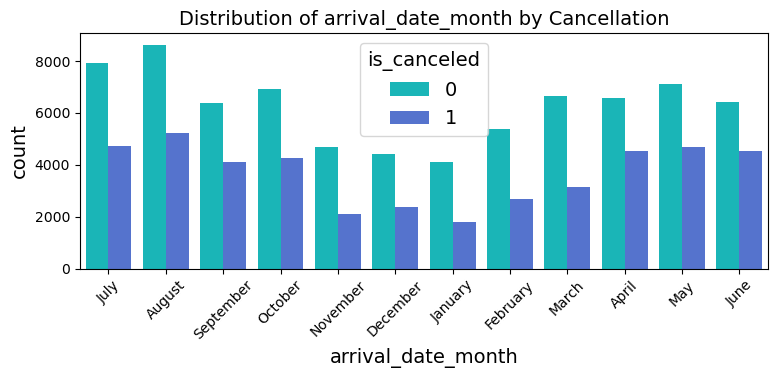

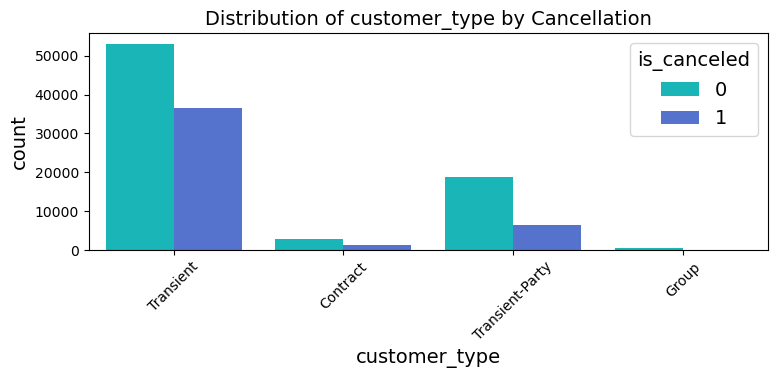

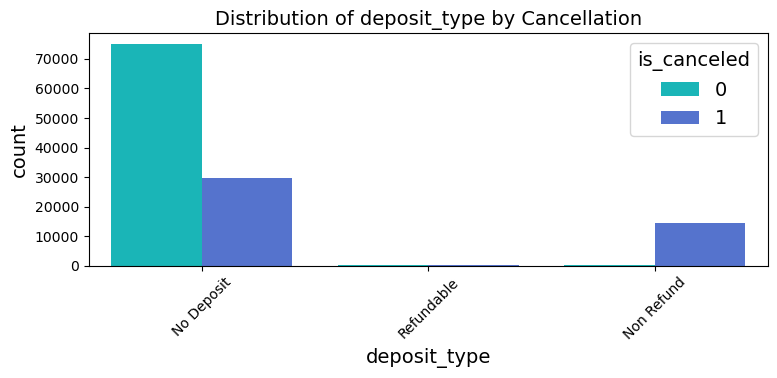

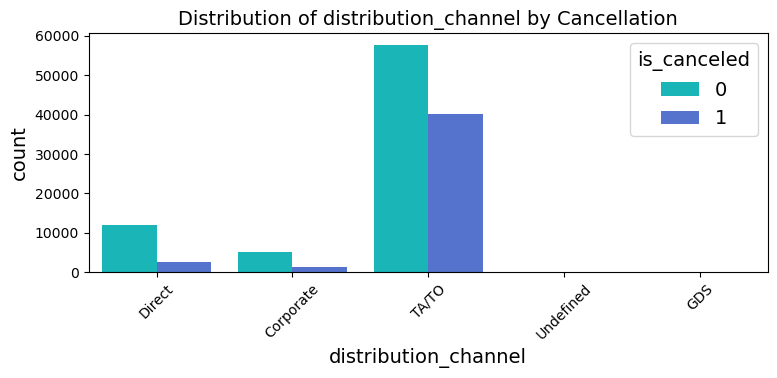

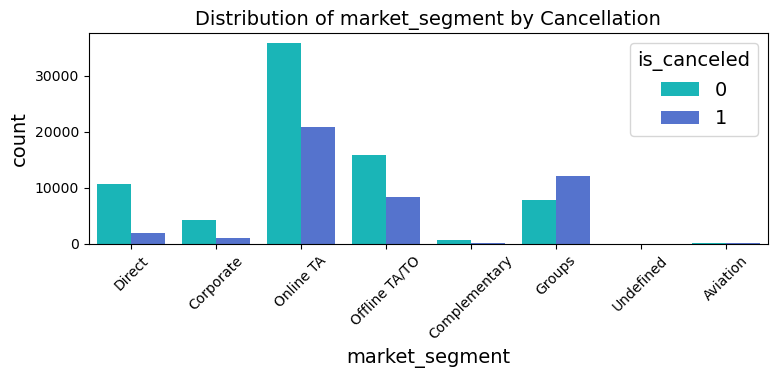

In [13]:
categorical_columns = ['arrival_date_month', 'customer_type', 'deposit_type','distribution_channel', 'market_segment']

# Plotting
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue="is_canceled", data=data, palette=['darkturquoise', 'royalblue'])
    plt.title(f'Distribution of {column} by Cancellation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


1. Chart 1: Both canceled and not canceled bookings are present in every month.There appears to be some seasonality in the booking data. The summer months (July and August) and spring months (March, April, May) show higher overall booking counts. This could be due to the holiday seasons when more people travel.appears to vary by month. Some months, like April, May, and June, have relatively higher cancellations compared to the total number of bookings, whereas months like September and October have a lower proportion of cancellations.July and August have the highest total count of bookings (both canceled and not canceled), indicating peak travel season during these months.

2. Chart 2: The bar chart provides insights into the count of hotel bookings by customer type, differentiated by cancellation status. Transient customers—the largest segment—have a substantial number of both canceled and non-canceled bookings, indicating high turnover. Contract customers have a lower number of bookings, but a significant portion is non-canceled, suggesting more reliable stays. The Transient-Party segment has a relatively balanced distribution of cancellations, while the Group segment shows the least number of bookings.
3. Chart 3: The bar chart illustrates the relationship between the type of deposit and cancellation status for hotel bookings. The majority of bookings are made with no deposit and have a lower cancellation rate compared to those with non-refundable deposits, which show a relatively high cancellation rate. Bookings made with refundable deposits have the least count. This could indicate that guests are less likely to cancel when they've made a financial commitment, especially if the deposit is non-refundable.
4. Chart 4: The bar chart presents the distribution of hotel bookings by distribution channel. This information could be vital for assessing the effectiveness and reliability of each distribution channel.The TA/TO (Travel Agent/Tour Operator) channel has the highest count of bookings suggesting it's the most utilized channel for making reservations. The Direct and Corporate channels have a lower overall number of bookings, but the Direct channel shows a higher rate of non-cancellations relative to cancellations compared to the Corporate channel.
5. Chart 5: The bar chart shows the count of hotel bookings by market segment, broken down by cancellation status. The Online TA (Travel Agent) segment has the highest overall count of bookings and a significant proportion of these bookings were canceled. The Offline TA/TO segment also has a substantial number of bookings with a relatively high cancellation rate. Direct bookings appear to have a lower cancellation rate compared to the TA/TO segments. Corporate, Complementary, Groups, and Aviation have fewer bookings in comparison, with the Groups segment showing a balanced distribution between canceled and non-canceled bookings. This distribution suggests that the market segment is a considerable factor in the likelihood of cancellations, with online bookings showing a tendency for higher cancellations.

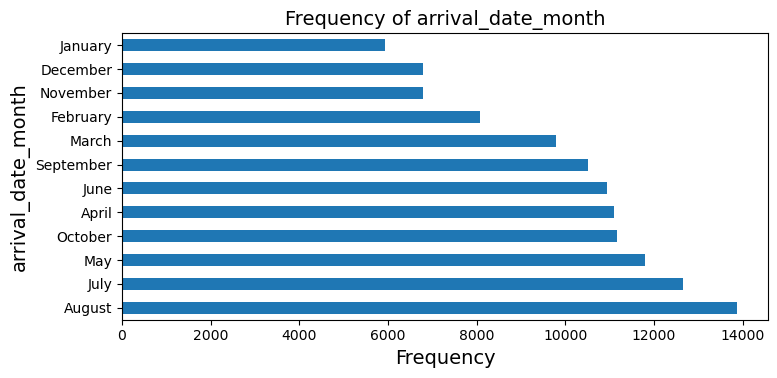

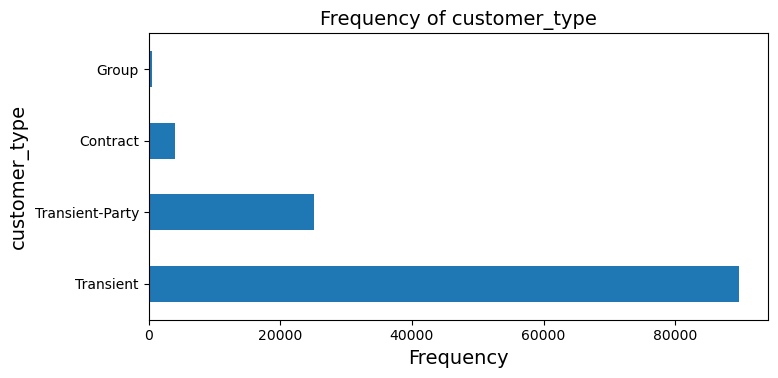

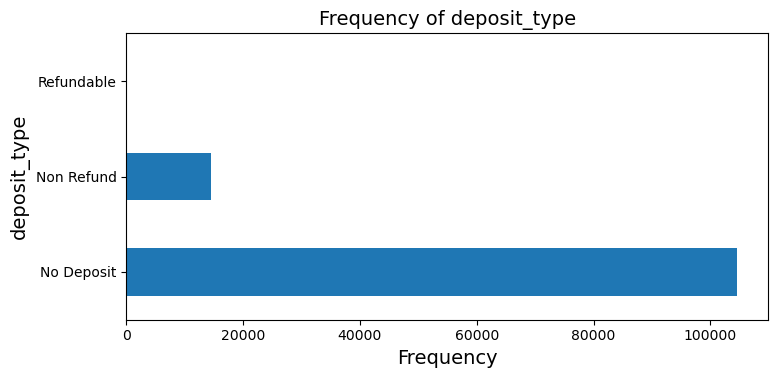

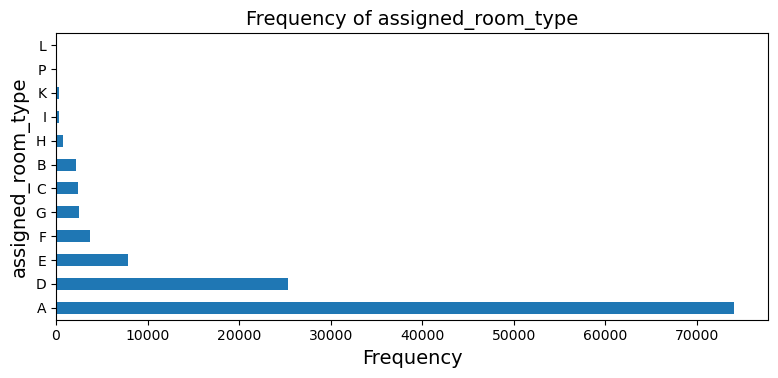

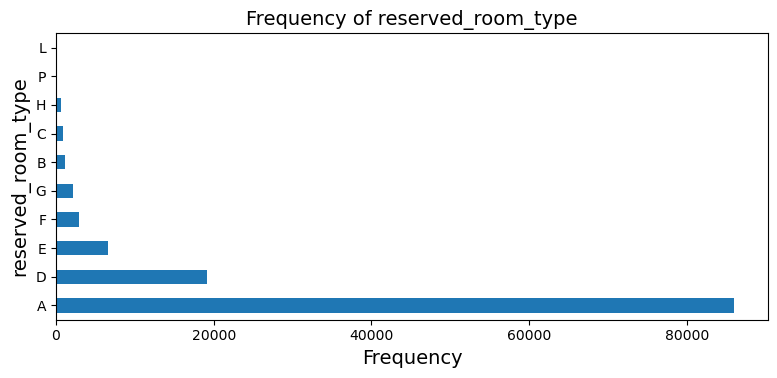

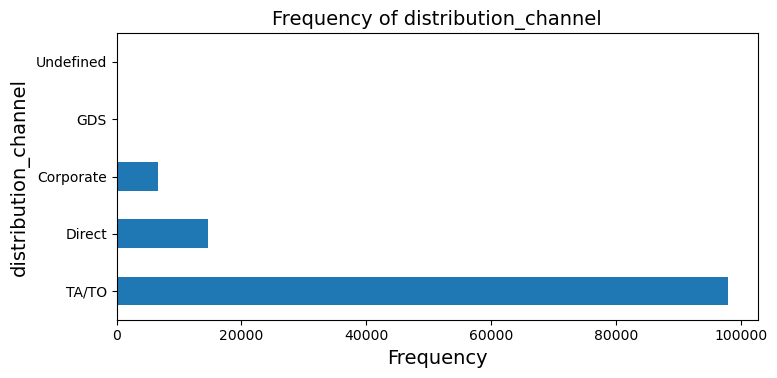

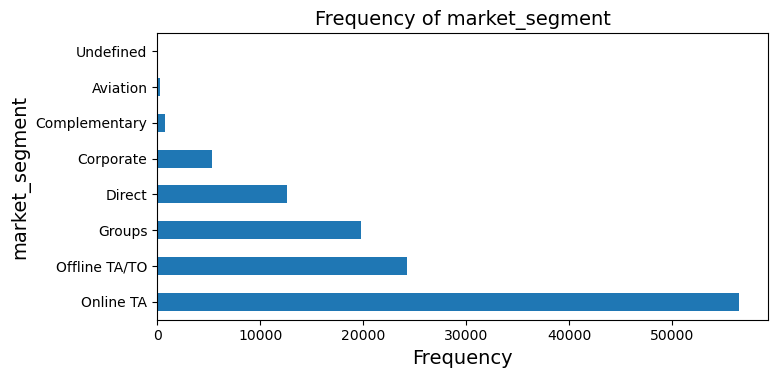

In [14]:
categorical_columns = ['arrival_date_month', 'customer_type', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
                      'distribution_channel', 'market_segment']

# Plotting
for column in categorical_columns:
    # Calculate frequency of each category
    value_counts = data[column].value_counts()

    
    # Create horizontal bar chart
    plt.figure(figsize=(8, 4))
    value_counts.plot(kind='barh')  # 'barh' creates a horizontal bar chart
    plt.title(f'Frequency of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.tight_layout()  # Adjust layout to make room for the longer labels
    plt.show()

Insights:

1. The arrival date month chart shows that August is the busiest month for hotel arrivals, followed by July, indicating a peak season during the summer months.

2. The customer type chart reveals that the majority of hotel customers are transient, suggesting that most business comes from individuals or walk-in guests rather than contracted groups or companies.

3. The deposit type chart indicates that most bookings do not require a deposit, which could imply a hotel policy designed for ease of booking or a specific customer preference pattern.

4. The assigned room type chart demonstrates a clear preference or higher availability for certain room types, with 'A' type rooms being the most frequently assigned.

5. The reserved room type chart closely mirrors the assigned room type chart, indicating consistency in room booking and assignment.

6. The distribution channel chart shows that the majority of bookings come through Travel Agents/Tour Operators (TA/TO), highlighting their importance in the hotel booking process.

7. Lastly, the market segment chart emphasizes that the majority of bookings are made through Online Travel Agents (Online TA), which aligns with current trends in the travel industry towards digital booking platforms.

# Top 10 Countries by Customer Count, Cancellations and Non-Cancellations

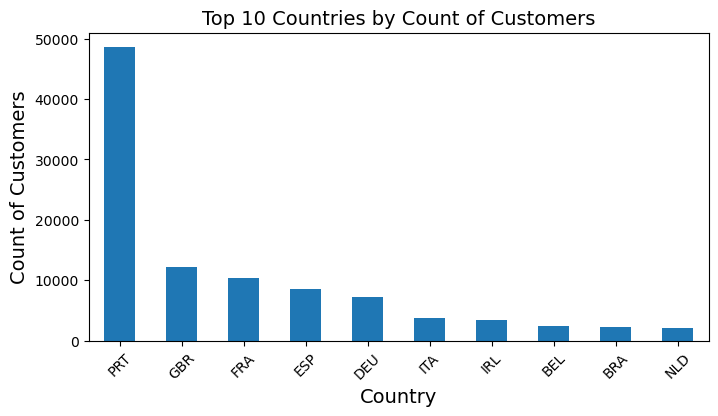

In [15]:
# Calculate the top 10 countries by count of customers
top_countries = data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Count of Customers')
plt.xlabel('Country')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


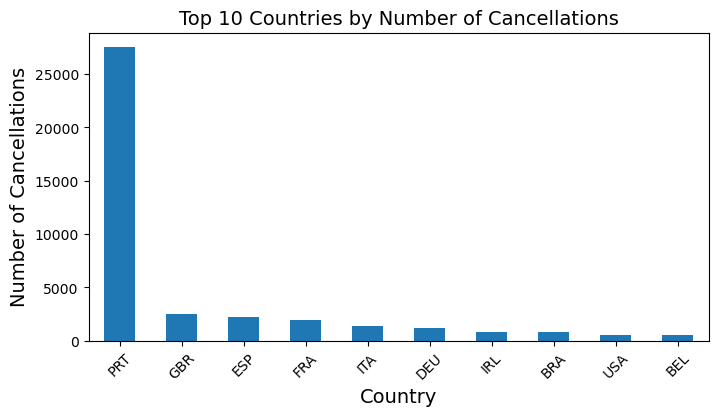

In [16]:
# Filter the dataset for canceled bookings
canceled_data = data[data['is_canceled'] == 1]

# Count the number of cancellations per country
cancellations_per_country = canceled_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
cancellations_per_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


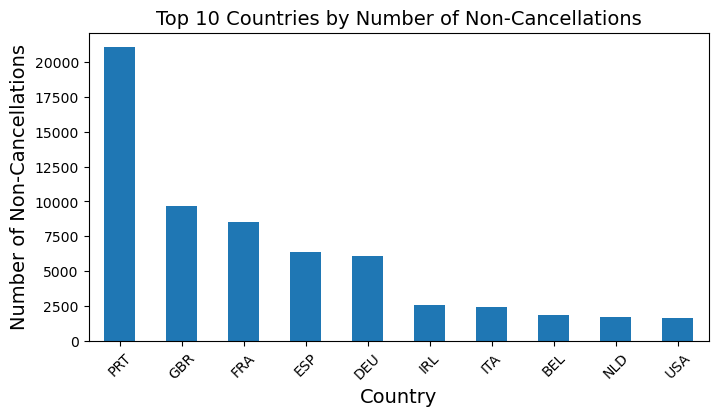

In [17]:
# Filter the dataset for canceled bookings
canceled_data = data[data['is_canceled'] == 0]

# Count the number of cancellations per country
cancellations_per_country = canceled_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
cancellations_per_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Non-Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Non-Cancellations')
plt.xticks(rotation=45)
plt.show()

The three bar charts represent the top 10 countries by count of customers, number of cancellations, and number of non-cancellations at a hotel. 

The country with the highest number of customers and non-cancellations is Portugal (PRT), followed by Great Britain (GBR), indicating a strong customer base from these countries. 
The cancellation chart also shows Portugal leading by a significant margin, suggesting either a higher booking volume that naturally leads to more cancellations or a potential issue that leads to a higher cancellation rate. 
The presence of certain countries like the United States (USA) in the top 10 for cancellations but not for non-cancellations could indicate different booking behaviors or economic factors affecting travel decisions. 

Overall, there's a clear pattern that countries with higher booking counts also have higher cancellations.

# PART 2: CLASSIFICATION MODEL TO PREDICT CANCELLATIONS

## Additional Imports for Classification Model

In [2]:
import numpy as np
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import *
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


## Preprocessing

In [3]:
# Load the data
df = pd.read_csv('hotel_booking.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

 Reservation Status, Reservation Status Date are Updated after is cancelled , so it is dropped


In [6]:
# Drop the 'reservation_status_date' and 'reservation_status_days_difference' columns
df = df.drop(['reservation_status_date', 'reservation_status','assigned_room_type'], axis=1)

 Removing Personal identification information

In [7]:
# check columns for percentage of missing values
missing = df.isnull().mean()*100
missing[missing > 0]


children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [8]:
# Distinct agent and company values
print(df['agent'].nunique())
print(df['company'].nunique())

333
352


Since the number of agents and company is very high and there are many missing values, we can omit these columns

In [9]:
# Drop the 'agent' and 'company' columns
df = df.drop(['agent', 'company'], axis=1)

In [10]:
df.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')

In [11]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

## Feature Engineering

In [12]:
df.sort_values(by=['name', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

In [13]:
#Create Number of bookings column counting the number of bookings by name prior to arrival year, month and day

df['num_bookings'] = df.groupby('name').cumcount()


In [14]:
# Arrival date year does not make sense for the model we want to build, so we drop it
df = df.drop(['arrival_date_year'], axis=1)

In [15]:
# Keep country names with more than 1000 bookings rest as 'Other'   
country_counts = df['country'].value_counts()
df['country'] = np.where(df['country'].isin(country_counts.index[country_counts > 1000]), df['country'], 'Other')




Drop PII like name, email, phone number and credit card

In [16]:
df = df.drop(['name', 'email','phone-number', 'credit_card'], axis=1)

## Test Train and Validation Split

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

In [18]:
from sklearn.model_selection import train_test_split
test, val = train_test_split(test, test_size=0.5, random_state=42)

In [19]:
print(len(train))
print(len(test))
print(len(val))

83573
17908
17909


In [20]:
# Check for null values
train.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          2
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
num_bookings                      0
dtype: int64

In [21]:
#Replace missing values with the 0 for the children column
train['children'] = train['children'].fillna(0)

## Categorical Encoding

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83573 entries, 51828 to 68492
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83573 non-null  object 
 1   is_canceled                     83573 non-null  int64  
 2   lead_time                       83573 non-null  int64  
 3   arrival_date_month              83573 non-null  object 
 4   arrival_date_week_number        83573 non-null  int64  
 5   arrival_date_day_of_month       83573 non-null  int64  
 6   stays_in_weekend_nights         83573 non-null  int64  
 7   stays_in_week_nights            83573 non-null  int64  
 8   adults                          83573 non-null  int64  
 9   children                        83573 non-null  float64
 10  babies                          83573 non-null  int64  
 11  meal                            83573 non-null  object 
 12  country                     

<Axes: >

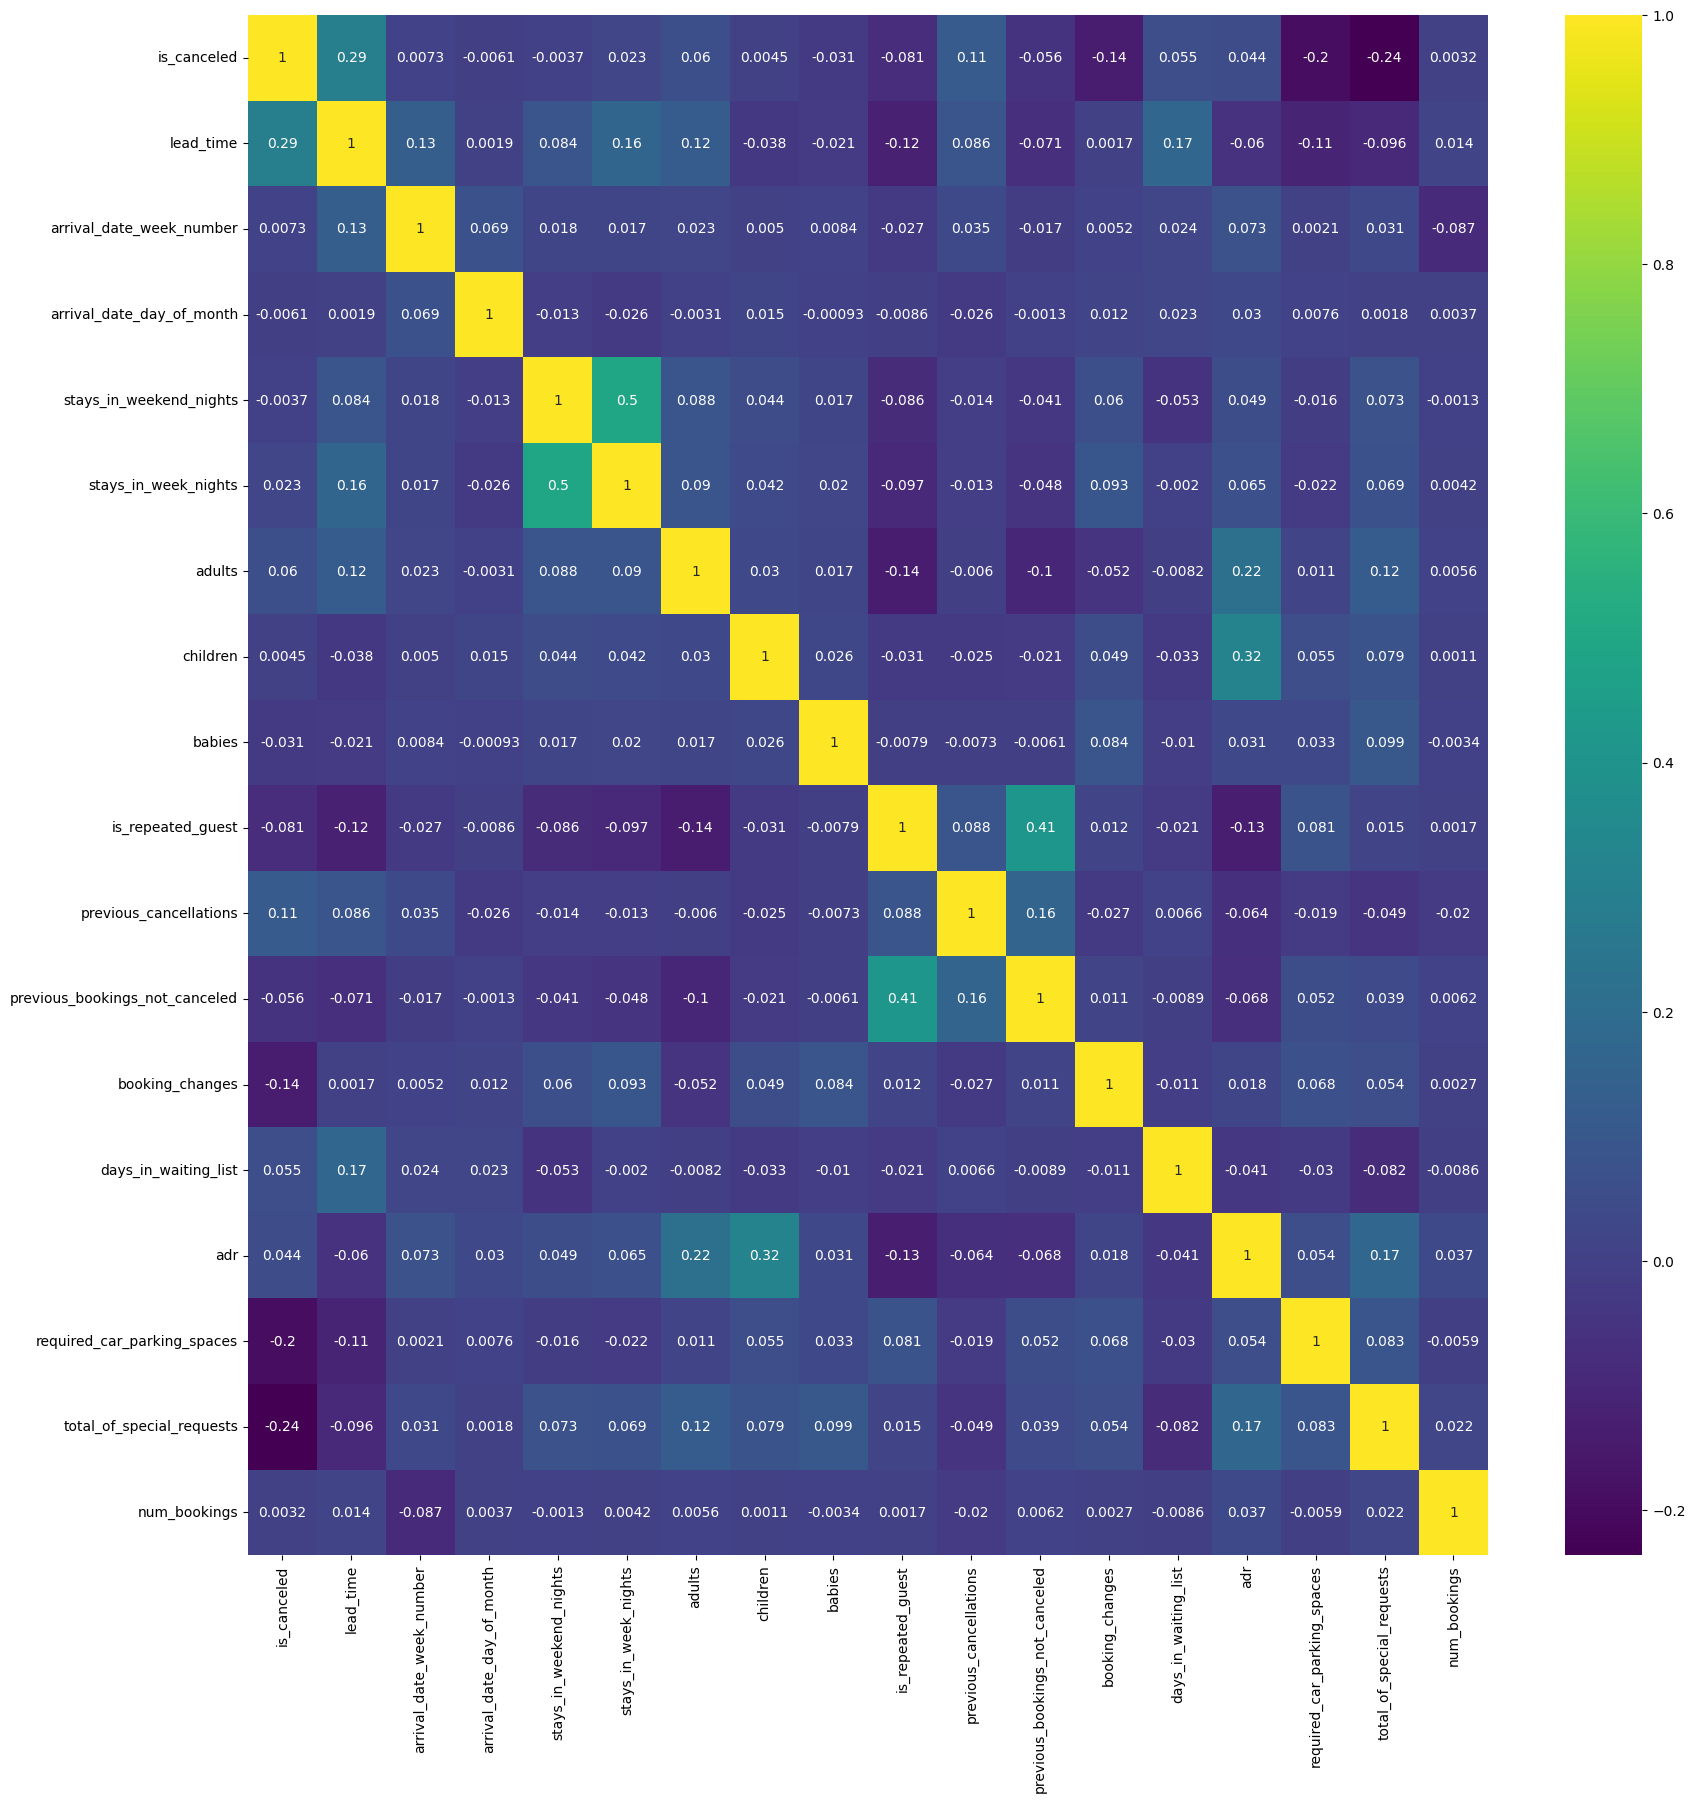

In [23]:
#Plotting a heatmap to check for correlation between the columns
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

In [24]:
# Using get_dummies to convert categorical columns to numerical columns
train = pd.get_dummies(train, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

## Outlier Identification and Treatment

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74]),
 [Text(1, 0, 'is_canceled'),
  Text(2, 0, 'lead_time'),
  Text(3, 0, 'arrival_date_week_number'),
  Text(4, 0, 'arrival_date_day_of_month'),
  Text(5, 0, 'stays_in_weekend_nights'),
  Text(6, 0, 'stays_in_week_nights'),
  Text(7, 0, 'adults'),
  Text(8, 0, 'children'),
  Text(9, 0, 'babies'),
  Text(10, 0, 'is_repeated_guest'),
  Text(11, 0, 'previous_cancellations'),
  Text(12, 0, 'previous_bookings_not_canceled'),
  Text(13, 0, 'booking_changes'),
  Text(14, 0, 'days_in_waiting_list'),
  Text(15, 0, 'adr'),
  Text(16, 0, 'required_car_parking_spaces'),
  Text(17, 0, 'total_of_special_requests'),
  Text(18, 0, 'num_bookings'),
  Text(19, 0, 'hotel_Resor

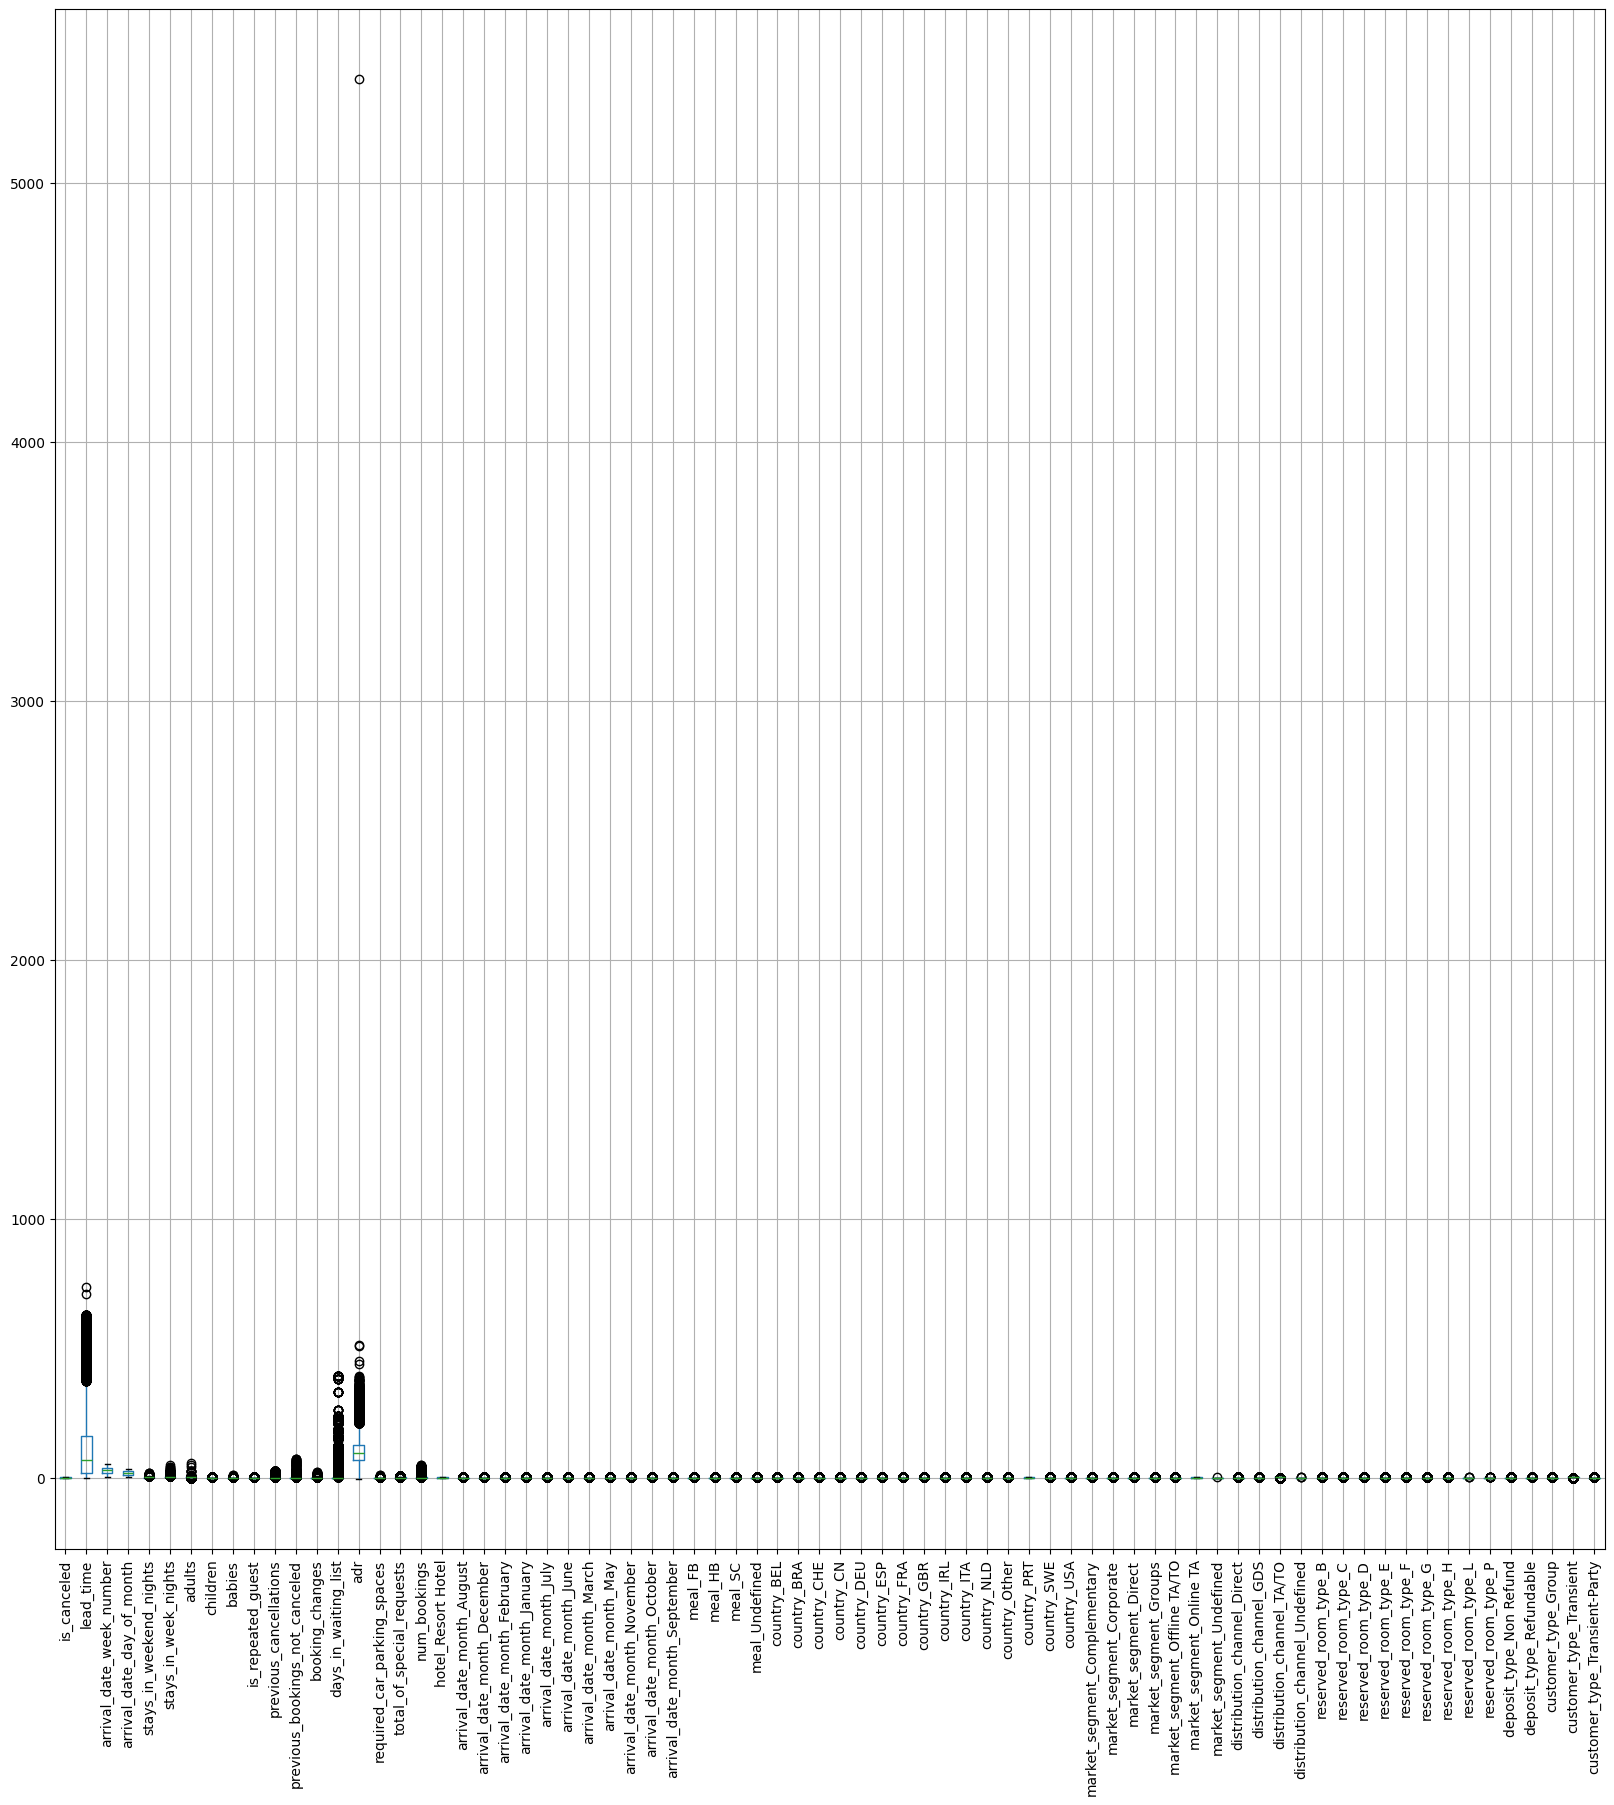

In [25]:
#Plot box plots for numerical columns to check for outliers
plt.figure(figsize=(20,20))
train.boxplot()
plt.xticks(rotation=90)


In [26]:
# Use isolation forest to remove outliers
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train)
score = iforest.decision_function(train)

from numpy import where
anom_index = where(pred== -1)
values = train.iloc[anom_index]
values



,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
8390,1,14,40,26,1,2,2,2.0,0,0,...,0,1,0,0,0,0,0,0,1,0
4277,1,45,10,1,0,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
25035,0,13,24,8,0,4,2,1.0,1,0,...,0,0,0,0,0,0,0,0,1,0
24991,0,143,23,4,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1331,0,58,35,24,1,4,2,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39827,0,228,34,23,2,5,2,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
14038,0,126,28,5,19,50,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
12035,1,234,23,9,2,5,3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8696,0,337,42,9,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
#Remove outliers
train = train.drop(values.index)


# Target Vs Features

In [28]:
# Split the data into features and target
X_train = train.drop('is_canceled', axis=1)
y_train = train['is_canceled']

# Feature Selection

In [29]:

randomforest = RandomForestClassifier(random_state=42)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")[:10]

,predictor,feature importance
54,market_segment_Undefined,0.000012
58,distribution_channel_Undefined,0.000018
66,reserved_room_type_L,0.000037
69,deposit_type_Refundable,0.000135
67,reserved_room_type_P,0.000181
56,distribution_channel_GDS,0.000230
70,customer_type_Group,0.000233
48,market_segment_Complementary,0.000416
65,reserved_room_type_H,0.000594
7,babies,0.000801


In [30]:
#Drop columns with low feature importance 'reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined'
X_train = X_train.drop(['reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined'], axis=1)


In [31]:
X_train.shape

(81901, 70)

## Standardize the Data

In [32]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [33]:
X_train_std.shape

(81901, 70)

## Preprocess Validation Data

In [34]:
# Check for null values
val.isnull().sum()
#Replace missing values with the 0 for the children column
val['children'] = val['children'].fillna(0)

# Using get_dummies to convert categorical columns to numerical columns
val = pd.get_dummies(val, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

# Split the data into features and target
X_val = val.drop('is_canceled', axis=1)
y_val = val['is_canceled']

#Drop columns with low feature importance 'reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined' if these columns exist
if 'reserved_room_type_L' in X_val.columns:
    X_val = X_val.drop(['reserved_room_type_L'], axis=1)
if 'market_segment_Undefined' in X_val.columns:
    X_val = X_val.drop(['market_segment_Undefined'], axis=1)
if 'distribution_channel_Undefined' in X_val.columns:
    X_val = X_val.drop(['distribution_channel_Undefined'], axis=1)

#standardize the data
sc = StandardScaler()
X_val = sc.fit_transform(X_val)





In [35]:
X_val.shape

(17909, 70)

## Base Model Classifier

In [35]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_std, y_train)

DummyClassifier()

In [36]:
#Accuracy of the dummy classifier
dummy_clf.score(X_val, y_val)


0.6304651292646155

In [37]:
print(metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))

[[11291     0]
 [ 6618     0]]


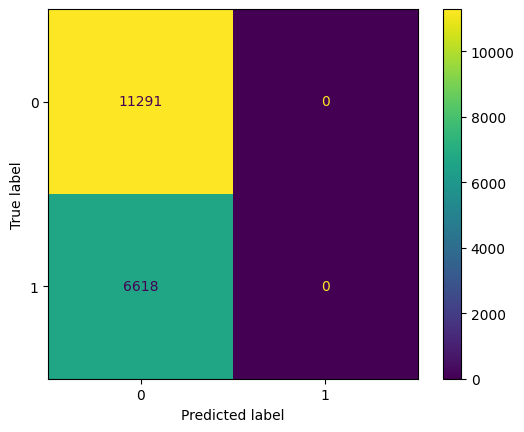

In [38]:
#plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))
disp.plot()


In [39]:
print(metrics.classification_report(dummy_clf.predict(X_val), y_val, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.630     0.773     17909
           1      0.000     0.000     0.000         0

    accuracy                          0.630     17909
   macro avg      0.500     0.315     0.387     17909
weighted avg      1.000     0.630     0.773     17909



## Evaluation Metrics

In [36]:
#ROC Curve

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [37]:
# PR Curve
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [68]:
#Classification Score
def clf_score(clf, X_train, y_train, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        #print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_train, clf.predict(X_train)),cmap='Blues')))
        print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay.from_predictions(y_train, clf.predict(X_train), cmap='Blues')))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        #print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_val, clf.predict(X_val)),cmap='Blues')))
        print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay.from_predictions(y_val, clf.predict(X_val), cmap='Blues')))
        print("End of validation Result\n")

def clf_score_test(clf, X_test, y_test):
    print("Validation Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
    
    precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
    average_precision = average_precision_score(y_test, clf.predict(X_test))
    plot_pr_curve(precision, recall, average_precision)
    
    fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
    roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    print("roc auc score: {}\n".format(roc_auc))
    plot_roc_curve(fpr, tpr, roc_auc)
    
    print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
    #print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_val, clf.predict(X_val)),cmap='Blues')))
    print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test), cmap='Blues')))
    print("End of validation Result\n")


## Dealing with Imbalanced Data

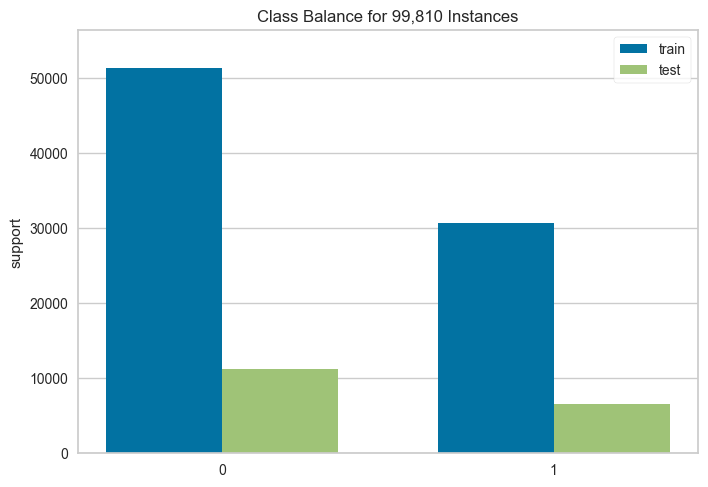

<Axes: title={'center': 'Class Balance for 99,810 Instances'}, ylabel='support'>

In [39]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train, y_val)        # Fit the data to the visualizer
visualizer.show()  

We can see an imbalanced dataset, O has more instances than 1. This makes sense due to the nature of the classification task that there would be more non cancelled bookings than cancelled ones

## Oversampling

In [40]:
print('Before OverSampling, the shape of X: {}'.format(X_train_std.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X: (81901, 70)
Before OverSampling, the shape of y: (81901,) 

Before OverSampling, counts of label '1': 30620
Before OverSampling, counts of label '0': 51281


In [41]:
#Use RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_std, y_train)

pd.Series(y_train_ros).value_counts()


0    51281
1    51281
Name: is_canceled, dtype: int64

In [42]:
print('After OverSampling, the shape of X: {}'.format(X_train_ros.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_ros.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, the shape of X: (102562, 70)
After OverSampling, the shape of y: (102562,) 

After OverSampling, counts of label '1': 51281
After OverSampling, counts of label '0': 51281


In [43]:
X_train_ros

array([[ 1.97940943, -0.3804681 ,  1.15660889, ..., -0.0625314 ,
        -1.74989903,  1.95222863],
       [-0.93329484, -1.48325773, -0.32399116, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       [ 0.95249446,  0.86936015,  0.81493195, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       ...,
       [-0.0744205 ,  1.38399531, -1.12123735, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       [-0.67189831, -1.40973843,  0.47325502, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       [ 1.22322659, -0.01287156, -1.12123735, ..., -0.0625314 ,
         0.57146154, -0.51223509]])

In [44]:
#Using SMOTE to handle imbalanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

pd.Series(y_train_smote).value_counts()

print('After OverSampling, the shape of X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))


After OverSampling, the shape of X: (102562, 70)
After OverSampling, the shape of y: (102562,) 

After OverSampling, counts of label '1': 51281
After OverSampling, counts of label '0': 51281


## Converting to Dataframe

In [45]:
#converting to dataframe
train_X = X_train
cols = list(train_X)

X_train_ros=pd.DataFrame(X_train_ros)
X_train_ros.columns=cols
#Renaming column name of Target variable
y_train_ros=pd.DataFrame(y_train_ros)
y_train_ros.columns = ['is_canceled']
scaled_train_df = pd.concat([X_train_ros,y_train_ros], axis=1)
scaled_train_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_canceled
0,1.979409,-0.380468,1.156609,-0.937594,0.296420,-1.523381,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,-1.749899,1.952229,0
1,-0.933295,-1.483258,-0.323991,0.090810,-0.802464,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,0
2,0.952494,0.869360,0.814932,1.119213,0.296420,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
3,-0.625220,-0.086391,0.587147,-0.937594,0.296420,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,0
4,0.896481,1.236957,0.928824,0.090810,0.296420,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,-0.662563,-1.924374,-1.349022,-0.937594,0.845862,-1.523381,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
102558,0.392359,0.060648,-1.349022,0.090810,1.395304,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
102559,-0.074421,1.383995,-1.121237,1.119213,1.395304,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
102560,-0.671898,-1.409738,0.473255,0.090810,-0.802464,-1.523381,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,2.661765,-0.034435,-0.062531,0.571462,-0.512235,1


<Axes: xlabel='is_canceled', ylabel='count'>

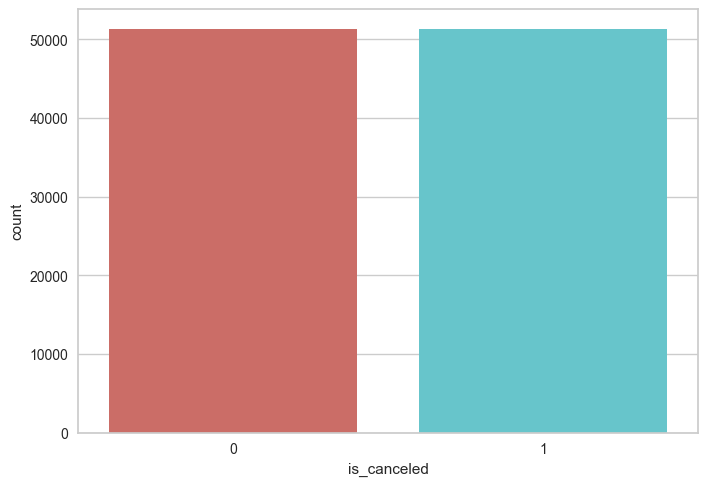

In [46]:
#Plot value counts of the target variable
sns.countplot(x='is_canceled', data=scaled_train_df, palette='hls')

The training data is now balanced

## Model Building

## 1. Dummy Classifier

In [54]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_ros, y_train_ros)

DummyClassifier()

Validation Result:

accuracy score: 0.6305



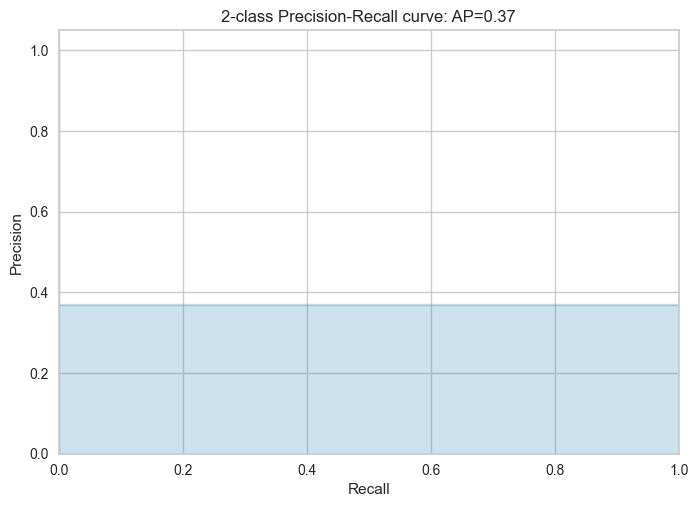

roc auc score: 0.5



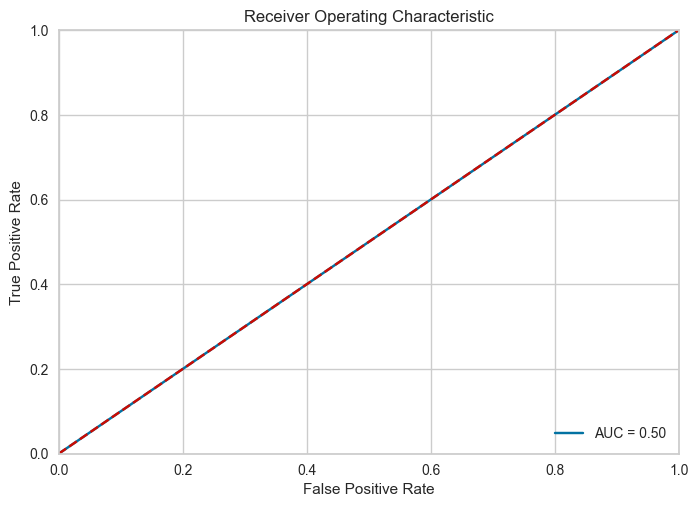

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77     11291
           1       0.00      0.00      0.00      6618

    accuracy                           0.63     17909
   macro avg       0.32      0.50      0.39     17909
weighted avg       0.40      0.63      0.49     17909


Confusion Matrix: 

End of validation Result



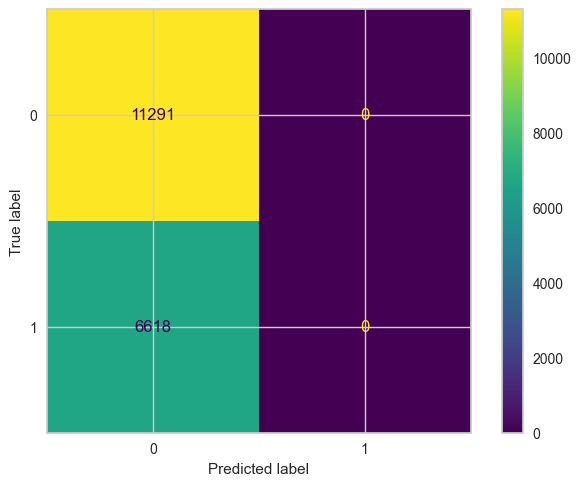

In [59]:
clf_score(clf_dummy, X_val, y_val, train=False)

## Logistic Regression

Validation Result:

accuracy score: 0.7982



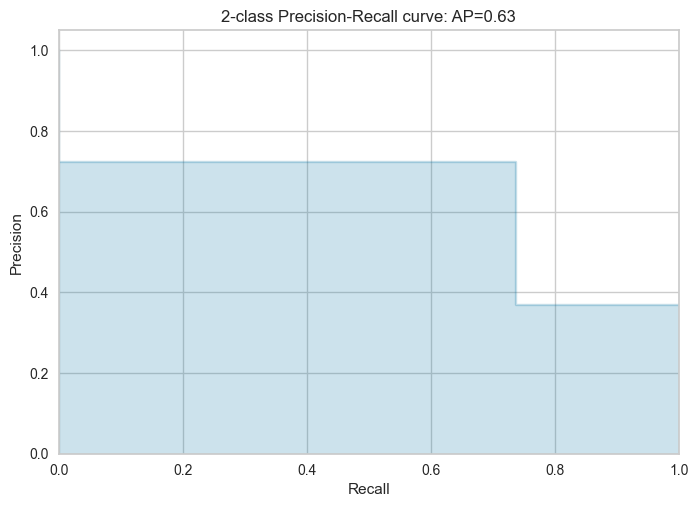

roc auc score: 0.785741505943525



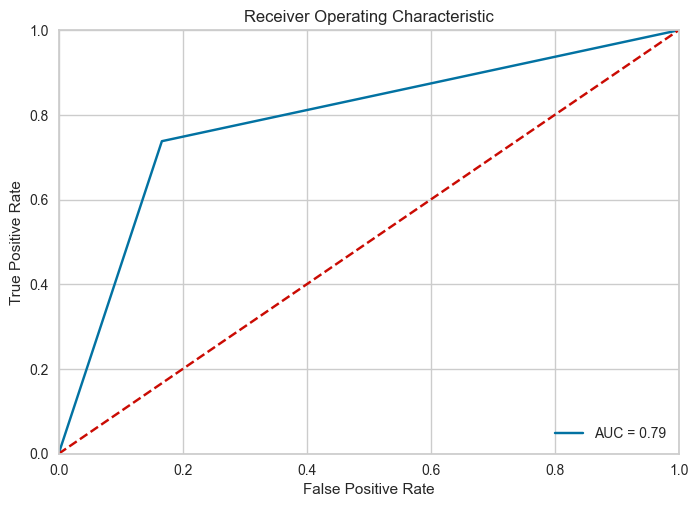

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     11291
           1       0.72      0.74      0.73      6618

    accuracy                           0.80     17909
   macro avg       0.78      0.79      0.78     17909
weighted avg       0.80      0.80      0.80     17909


Confusion Matrix: 

End of validation Result



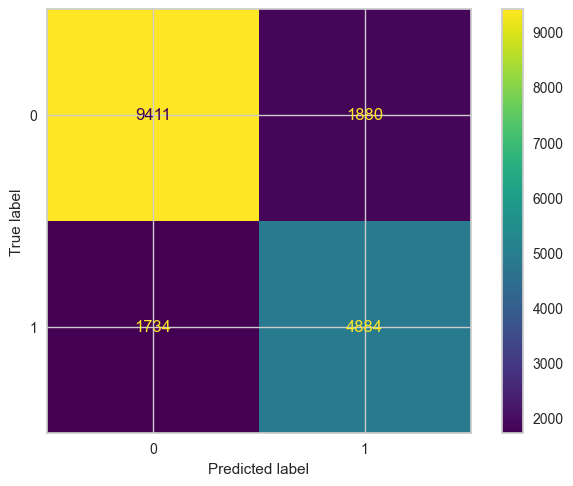

In [60]:
from sklearn.linear_model import LogisticRegression

clf_log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_log_reg.fit(X_train_ros, y_train_ros)

clf_score(clf_log_reg, X_val, y_val, train=False)

## Random Forest

Validation Result:

accuracy score: 0.8827



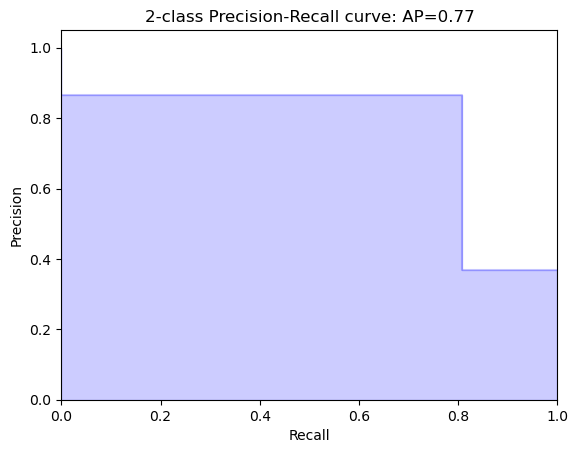

roc auc score: 0.8672633557714207



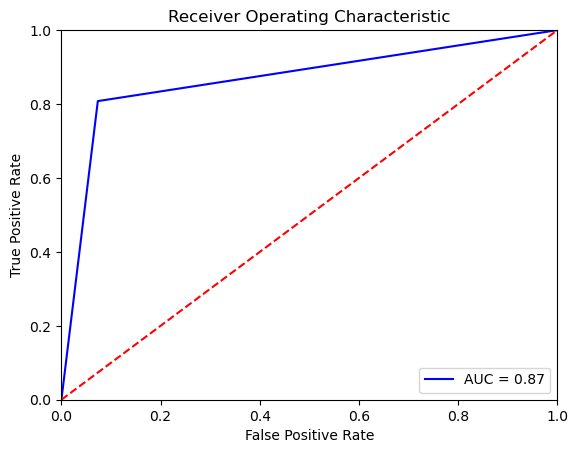

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     11291
           1       0.87      0.81      0.84      6618

    accuracy                           0.88     17909
   macro avg       0.88      0.87      0.87     17909
weighted avg       0.88      0.88      0.88     17909


Confusion Matrix: 

End of validation Result



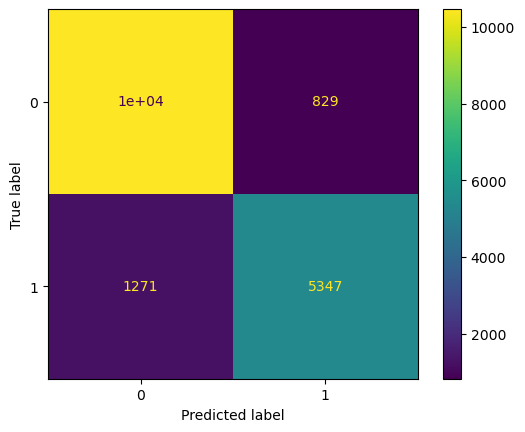

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_ros, y_train_ros)

clf_score(clf_rf, X_val, y_val,train=False)

## KNN

Validation Result:

accuracy score: 0.8120



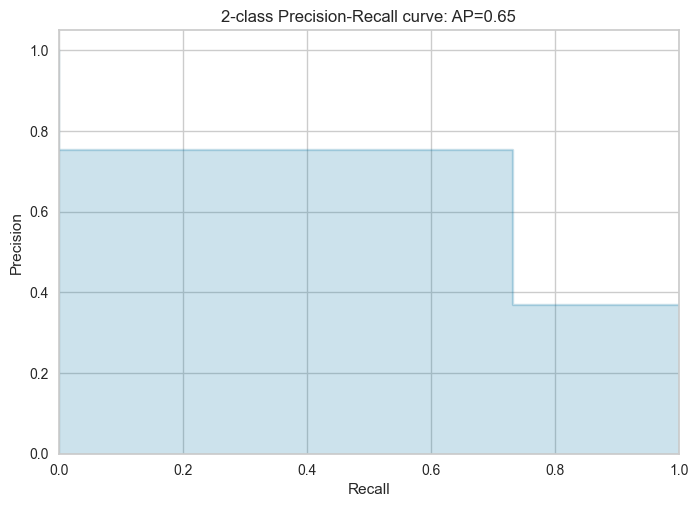

roc auc score: 0.7956475616255151



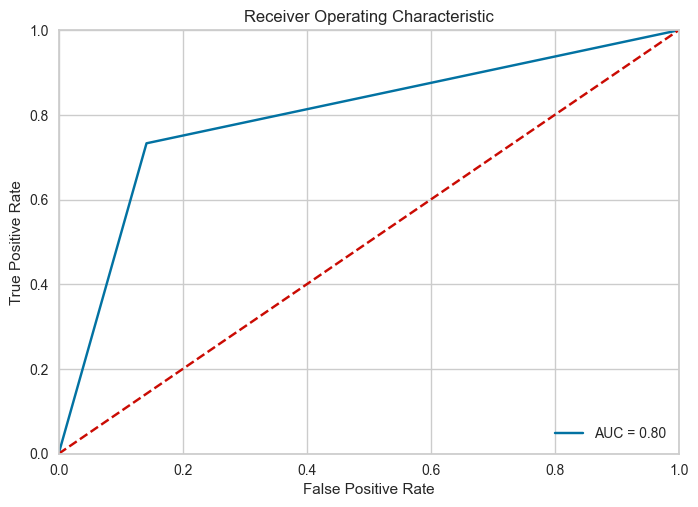

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     11291
           1       0.75      0.73      0.74      6618

    accuracy                           0.81     17909
   macro avg       0.80      0.80      0.80     17909
weighted avg       0.81      0.81      0.81     17909


Confusion Matrix: 

End of validation Result



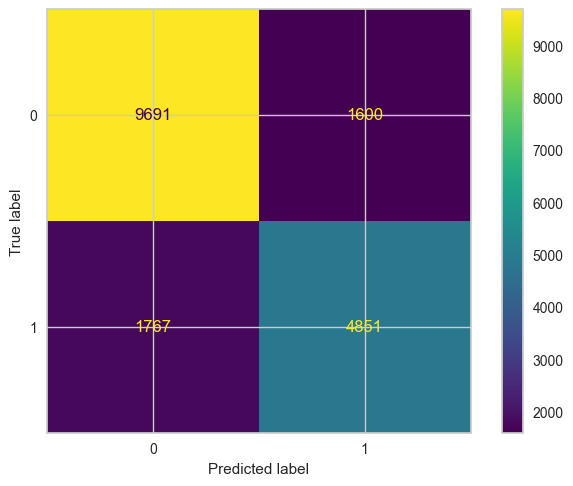

In [62]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(X_train_ros, y_train_ros)

clf_score(clf_knn, X_val, y_val, train=False)

## XGBOOST

Validation Result:

accuracy score: 0.7330



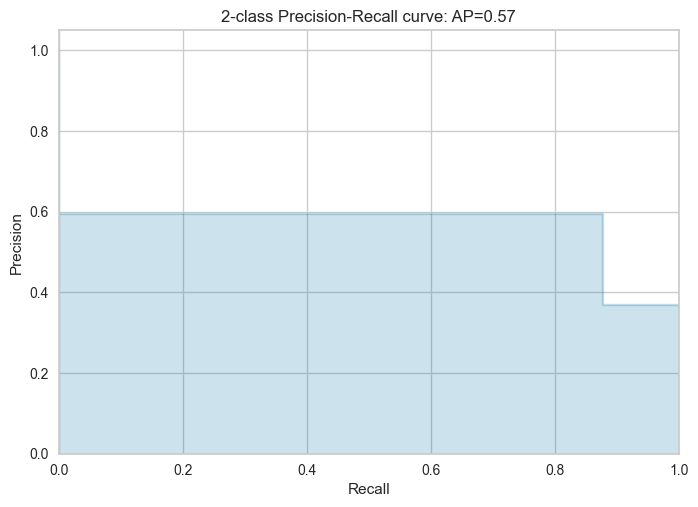

roc auc score: 0.7630490486851064



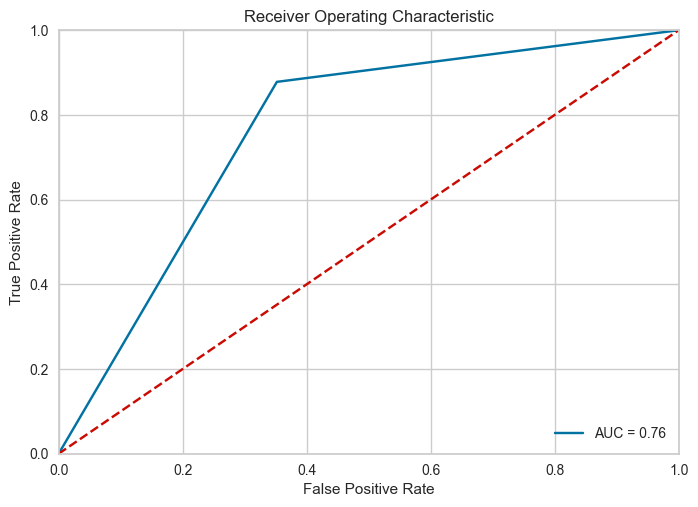

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.65      0.75     11291
           1       0.59      0.88      0.71      6618

    accuracy                           0.73     17909
   macro avg       0.75      0.76      0.73     17909
weighted avg       0.79      0.73      0.74     17909


Confusion Matrix: 

End of validation Result



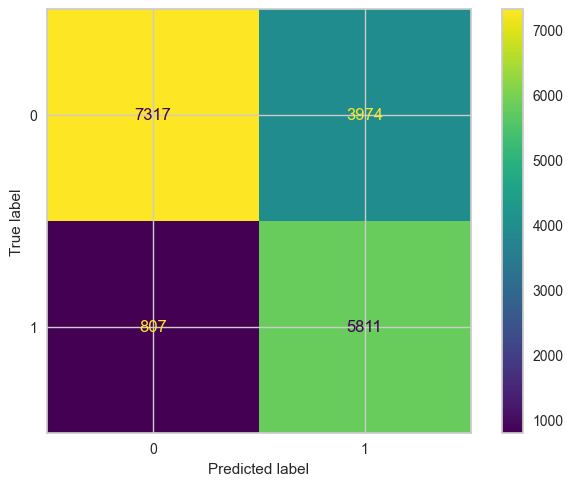

In [63]:
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_xgb.fit(X_train_smote, y_train_smote)

clf_score(clf_xgb, X_val, y_val, train=False)

## Adaboost

Validation Result:

accuracy score: 0.8119



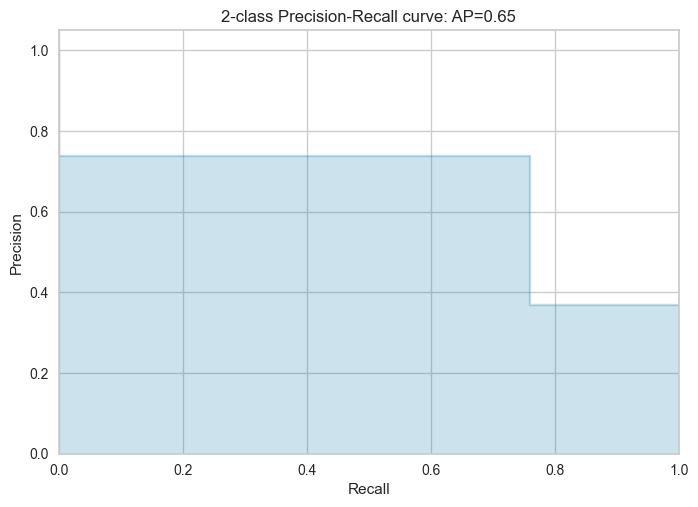

roc auc score: 0.8011377975526364



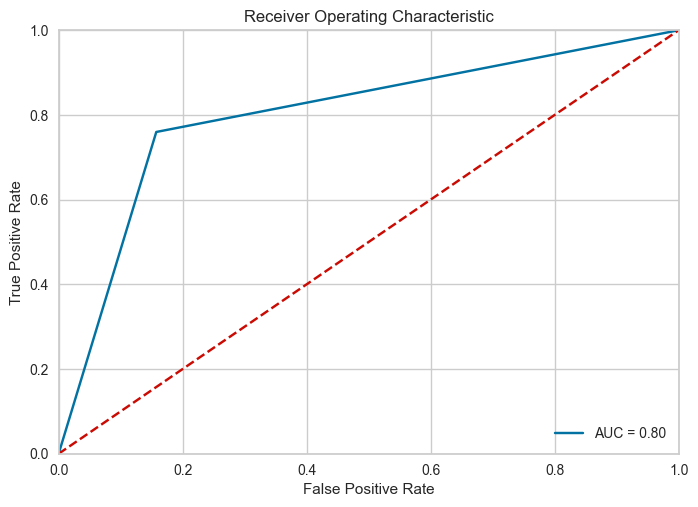

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     11291
           1       0.74      0.76      0.75      6618

    accuracy                           0.81     17909
   macro avg       0.80      0.80      0.80     17909
weighted avg       0.81      0.81      0.81     17909


Confusion Matrix: 

End of validation Result



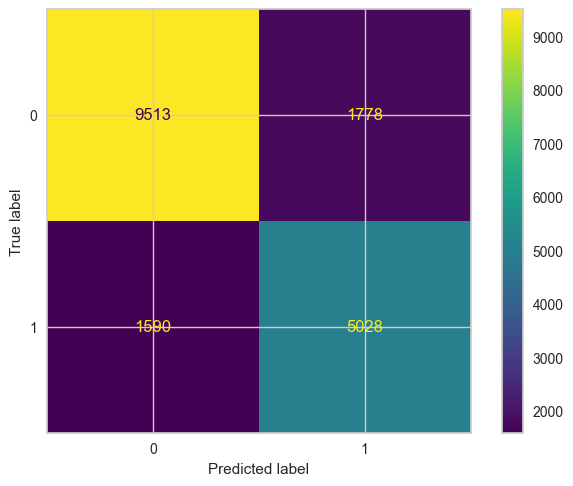

In [64]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train_ros, y_train_ros)

clf_score(clf_ada_boost, X_val, y_val,  train=False)

## CatBoost

                                              0.0/101.0 MB ? eta -:--:--
                                             0.5/101.0 MB 10.2 MB/s eta 0:00:10
                                             0.9/101.0 MB 11.3 MB/s eta 0:00:09
                                             1.3/101.0 MB 10.4 MB/s eta 0:00:10
                                             1.7/101.0 MB 11.0 MB/s eta 0:00:10
                                             2.2/101.0 MB 11.4 MB/s eta 0:00:09
                                             2.5/101.0 MB 10.7 MB/s eta 0:00:10
     -                                       3.0/101.0 MB 10.5 MB/s eta 0:00:10
     -                                        3.2/101.0 MB 9.8 MB/s eta 0:00:10
     -                                        3.6/101.0 MB 9.7 MB/s eta 0:00:11
     -                                       4.1/101.0 MB 10.0 MB/s eta 0:00:10
     -                                        4.6/101.0 MB 9.9 MB/s eta 0:00:10
     -                                       5.

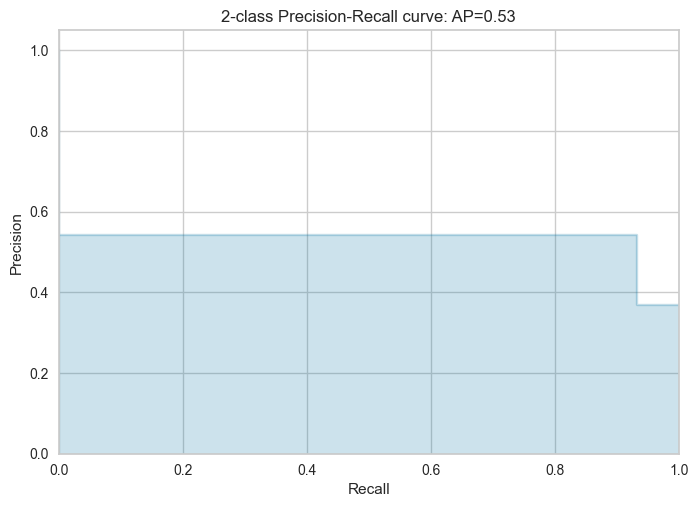

roc auc score: 0.7361259267758703



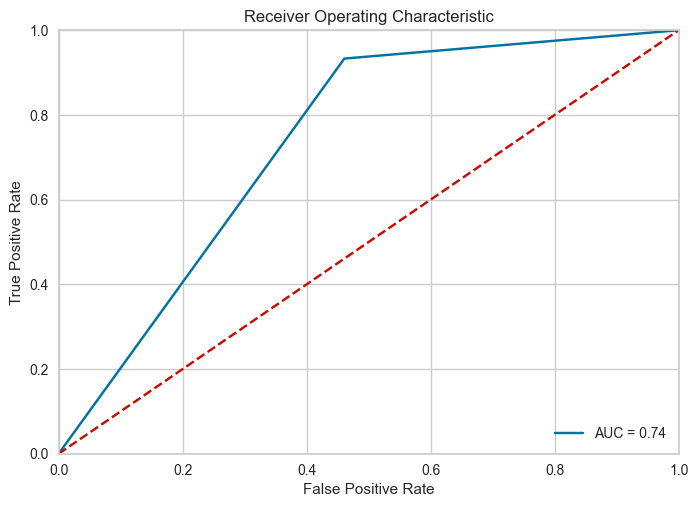

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.54      0.68     11291
           1       0.54      0.93      0.69      6618

    accuracy                           0.68     17909
   macro avg       0.74      0.74      0.68     17909
weighted avg       0.79      0.68      0.68     17909


Confusion Matrix: 

End of validation Result



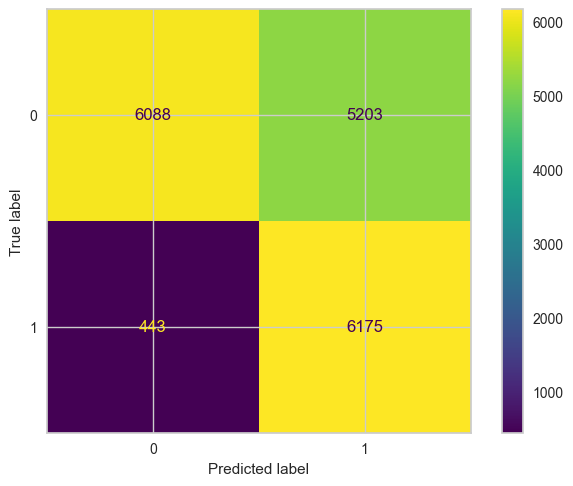

In [66]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

clf_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True)
# train the model
clf_cat_boost.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_cat_boost.predict(X_val)
preds_proba = clf_cat_boost.predict_proba(X_val)
#print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_cat_boost, X_val, y_val,  train=False)

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 51281, number of negative: 51281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 102562, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
proba =  [[7.06660476e-01 2.93339524e-01]
 [6.83041131e-02 9.31695887e-01]
 [6.92915025e-04 9.99307085e-01]
 ...
 [7.87019392e-01 2.12980608e-01]
 [9.80471718e-01 1.95282819e-02]
 [9.87888302e-01 1.21116979e-02]]
Validation Result:

accuracy score: 0.8516



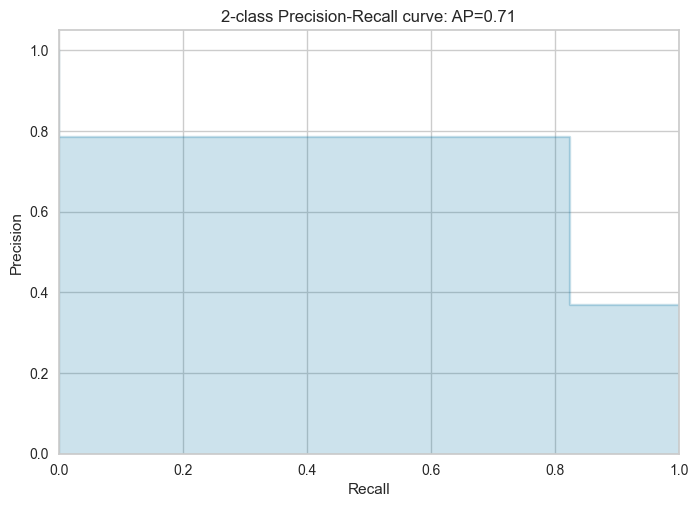

roc auc score: 0.8458991359624756



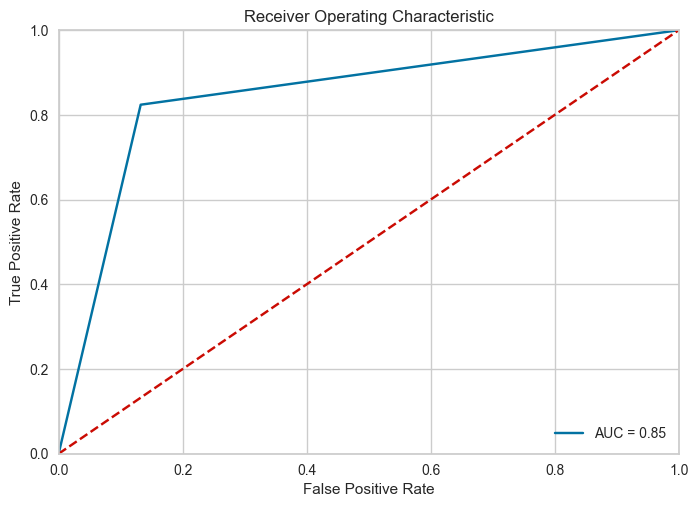

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     11291
           1       0.78      0.82      0.80      6618

    accuracy                           0.85     17909
   macro avg       0.84      0.85      0.84     17909
weighted avg       0.85      0.85      0.85     17909


Confusion Matrix: 

End of validation Result



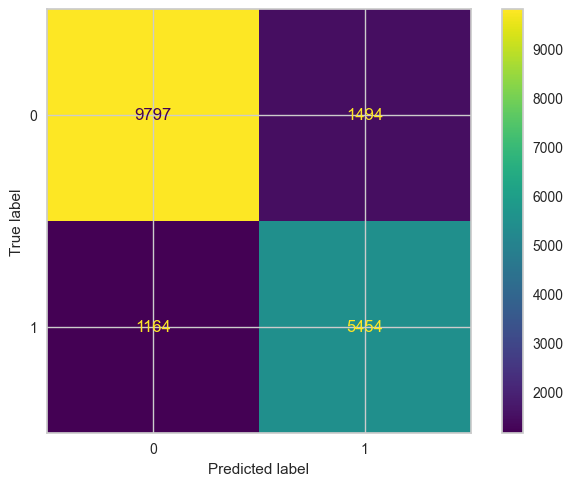

In [93]:
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(random_state=42)
clf_lgbm.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_lgbm.predict(X_val)
preds_proba = clf_lgbm.predict_proba(X_val)
#print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_lgbm, X_val, y_val,  train=False)

# Hyperparameter Tuning

### 1. Random Forest

In [94]:
from sklearn.model_selection import GridSearchCV

clf_rf_grid = RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}
cv = GridSearchCV(clf_rf_grid, params,n_jobs=-1, scoring='roc_auc').fit(X_train_ros, y_train_ros)
print(cv.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


### Use best hyperparameters with RF

In [47]:
clf_rf_best = RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 1,
        "n_estimators": 200,
        "random_state": 42,
    })
clf_rf_best.fit(X_train_ros, y_train_ros)
print("Accuracy score of the best model: ", accuracy_score(y_val, clf_rf_best.predict(X_val)))
print("\nROC-AUC score of the best model: ", roc_auc_score(y_val, clf_rf_best.predict(X_val)))

Accuracy score of the best model:  0.8803953319559997

ROC-AUC score of the best model:  0.864715561050277


### 2. XGBoost

In [82]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

clf_xgb = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=clf_xgb, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=-1, n_jobs=-1)
grid_search.fit(X_train_ros, y_train_ros)

best_clf_xgb = grid_search.best_estimator_
print("Best hyperparameters:\n", grid_search.best_params_)

Best hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


### Use best hyperparameters with XGB

In [85]:
clf_xgb_best = xgb.XGBClassifier(
    **{
        'n_estimators': 300,  
        'learning_rate': 0.1, 
        'max_depth': 5,
        "random_state": 42,
    })
clf_xgb_best.fit(X_train_ros, y_train_ros)
print("Accuracy score of the best model: ", accuracy_score(y_val, clf_xgb_best.predict(X_val)))
print("\nROC-AUC score of the best model: ", roc_auc_score(y_val, clf_xgb_best.predict(X_val)))

Accuracy score of the best model:  0.7687196381707522

ROC-AUC score of the best model:  0.7853111078154202


### 3. Catboost

In [86]:
param_grid = {
    'iterations': [100, 200], 
    'depth': [4, 6],           
    'learning_rate': [0.01, 0.1],  
    'loss_function': ['Logloss', 'CrossEntropy']  
}

clf_cat_boost = CatBoostClassifier(verbose=False)

grid_search = GridSearchCV(estimator=clf_cat_boost,
                           param_grid=param_grid,
                           scoring='roc_auc',  
                           cv=5,              
                           n_jobs=-1) 
        
grid_search.fit(X_train_ros, y_train_ros)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'depth': 6, 'iterations': 200, 'learning_rate': 0.1, 'loss_function': 'Logloss'}


### Use best hyperparameters with Catboost

In [88]:
clf_cat_boost_best = CatBoostClassifier(
    **{
        'iterations': 200, 
        'depth': 6,           
        'learning_rate': 0.1,  
        'loss_function': 'Logloss',
        "random_state": 42,
        'verbose': False
    })
clf_cat_boost_best.fit(X_train_ros, y_train_ros)
print("Accuracy score of the best model: ", accuracy_score(y_val, clf_cat_boost_best.predict(X_val)))
print("\nROC-AUC score of the best model: ", roc_auc_score(y_val, clf_cat_boost_best.predict(X_val)))

Accuracy score of the best model:  0.8501870567870903

ROC-AUC score of the best model:  0.8454174289066896


### 4. Adaboost

In [89]:
param_grid = {
    'n_estimators': [30, 50],
    'learning_rate': [0.01, 0.1]
}

clf_ada_boost = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf_ada_boost,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_ros, y_train_ros)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 50}


### Use best hyperparameters with Adaboost

In [92]:
clf_ada_boost_best = AdaBoostClassifier(
    **{
        'n_estimators': 50,
        'learning_rate': 0.1,
        "random_state": 42
    })

clf_ada_boost_best.fit(X_train_ros, y_train_ros)
print("Accuracy score of the best model: ", accuracy_score(y_val, clf_ada_boost_best.predict(X_val)))
print("\nROC-AUC score of the best model: ", roc_auc_score(y_val, clf_ada_boost_best.predict(X_val)))

Accuracy score of the best model:  0.8158467809481267

ROC-AUC score of the best model:  0.7944818492861676


### 5. LightGBM

In [97]:
param_grid = {
    'num_leaves': [31, 41],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'boosting_type': ['gbdt', 'dart']
}

clf_lgbm = LGBMClassifier(random_state=42, verbose=-1)

grid_search = GridSearchCV(estimator=clf_lgbm,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_ros, y_train_ros)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 41}


### Use best hyperparameters with LightGBM

In [101]:
clf_lgbm_best = LGBMClassifier(
    **{
        'num_leaves': 41,
        'learning_rate': 0.1,
        'n_estimators': 200,
        'boosting_type': 'gbdt',
        "random_state": 42,
        'verbose': -1
    })

clf_lgbm_best.fit(X_train_ros, y_train_ros)
print("Accuracy score of the best model: ", accuracy_score(y_val, clf_lgbm_best.predict(X_val)))
print("\nROC-AUC score of the best model: ", roc_auc_score(y_val, clf_lgbm_best.predict(X_val)))

Accuracy score of the best model:  0.8594561393712659

ROC-AUC score of the best model:  0.8539878867035711


## Stacked Model with best set of hyperparameters

In [103]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('rf', RandomForestClassifier(n_estimators=200,max_features='auto',min_samples_leaf=1, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, verbose=-1, random_state=42)),
    ('ada_boost', AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)),
    ('cat_boost', CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False, random_state=42)),
    ('lgbm', LGBMClassifier(num_leaves=41, learning_rate=0.1, n_estimators=200, boosting_type='gbdt', random_state=42, verbose=-1))
]

clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf_stack.fit(X_train_ros, y_train_ros)

print("Accuracy score of the stacked model: ", accuracy_score(y_val, clf_stack.predict(X_val)))
print("\nROC-AUC score of the stacked model: ", roc_auc_score(y_val, clf_stack.predict(X_val)))

Accuracy score of the stacked model:  0.876207493439053

ROC-AUC score of the stacked model:  0.8521701334452333


# Model Selection (using validation set)

| Sl No | Model               | Default Model Accuracy | Default Model ROC-AUC | Fine-tuned Model Accuracy | Fine-tuned Model ROC-AUC |
|:-----:| ------------------- |:----------------------:|:---------------------:|:-------------------------:|:------------------------:|
| 1     | DummyClassifier     |          0.631         |         0.500         |                           |                          |
| 2     | LogisticRegression  |          0.798         |         0.786         |                           |                          |
| 3     | KNN                 |          0.812         |         0.796         |                           |                          |
| 4     | RandomForest        |          0.878         |         0.862         |           0.880           |          0.865           |
| 5     | XGBoost             |          0.733         |         0.763         |           0.769           |          0.785           |
| 6     | AdaBoost            |          0.812         |         0.801         |           0.816           |          0.794           |
| 7     | CatBoost            |          0.685         |         0.736         |           0.850           |          0.845           |
| 8     | LightGBM            |          0.852         |         0.846         |           0.859           |          0.854           |
| 9     | Stacked Model       |                        |                       |           0.876           |          0.852           |


Upon evaluating the performance metrics of various models, we have decided to proceed with the fine-tuned Random Forest model as the preferred choice for next steps, including model interpretation, explainability, and serialization. This model has the highest accuracy of 0.880 and a ROC-AUC score of 0.865 post fine-tuning, suggesting that this model has strong predictive accuracy and the ability to effectively differentiate between the target classes.

## Preprocessing for Test set

In [48]:
# Check for null values
test.isnull().sum()
#Replace missing values with the 0 for the children column
test['children'] = test['children'].fillna(0)

# Using get_dummies to convert categorical columns to numerical columns
test = pd.get_dummies(test, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

# Split the data into features and target
X_test = test.drop('is_canceled', axis=1)
y_test = test['is_canceled']

#Drop columns with low feature importance 'reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined' if these columns exist
if 'reserved_room_type_L' in X_test.columns:
    X_test = X_test.drop(['reserved_room_type_L'], axis=1)
if 'market_segment_Undefined' in X_test.columns:
    X_test = X_test.drop(['market_segment_Undefined'], axis=1)
if 'distribution_channel_Undefined' in X_test.columns:
    X_test = X_test.drop(['distribution_channel_Undefined'], axis=1)

#standardize the data
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

# Model Interpretation: Feature Importance

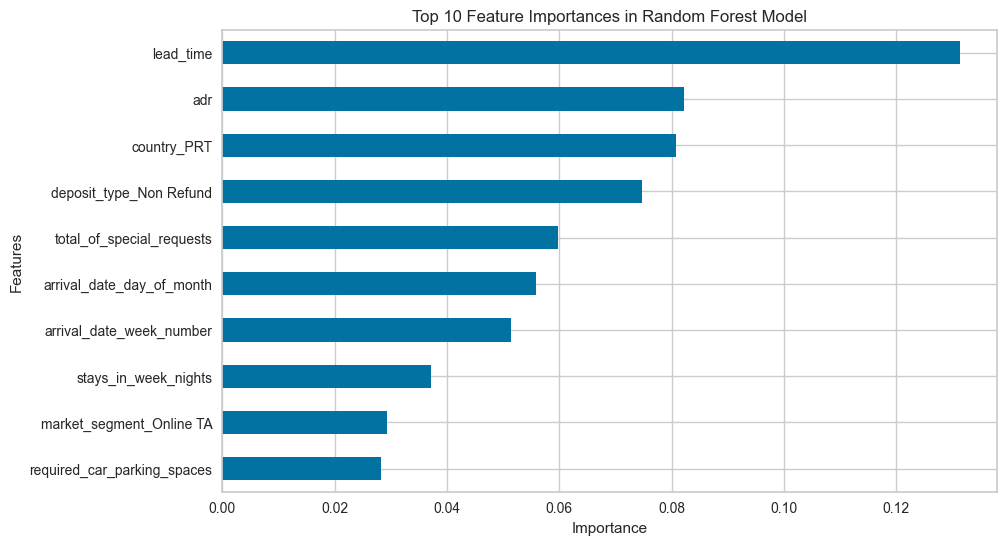

In [104]:
feature_importances = clf_rf_best.feature_importances_
features = pd.Series(feature_importances, index=X_train_ros.columns).sort_values(ascending=False)
top_features = features[:10]

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  
plt.show()

### Interpretation of Feature Importance Scores:

1. Importance of Lead Time: With a score of approximately 0.131, lead time emerges as the most influential factor affecting the model's predictions. This indicates that the time span between booking and actual stay plays a crucial role in determining the cancellations.

2. Price Sensitivity: The feature 'adr' (average daily rate) holds significant predictive power with a score of 0.082, suggesting that the pricing strategy of the hotel directly influences customer decisions, highlighting the importance of competitive pricing.

3. Geographic Influence: The importance score of around 0.081 for 'country_PRT' (Portugal) highlights the substantial impact of the customer's country of origin, particularly Portuguese customers, on the model's decisions, possibly due to market-specific behaviors or preferences.

4. Policy & Preferences: The 'deposit_type_Non Refund' feature, with an importance score of 0.075, along with 'total_of_special_requests' at approximately 0.060, indicates that cancellation policies and the number of special requests made by customers are key determinants in the model's predictions, affecting customer satisfaction and retention.

5. Lesser Impact of Specific Attributes: Features like 'market_segment_Complementary', 'distribution_channel_GDS', 'reserved_room_type_P', 'customer_type_Group', and 'deposit_type_Refundable' have minimal impact on the model's predictions, with scores all below 0.001. This suggests that while these attributes may provide some insights into customer behavior, they are far less critical in influencing the overall prediction compared to the top features.

# Model Interpretation: SHAP Values

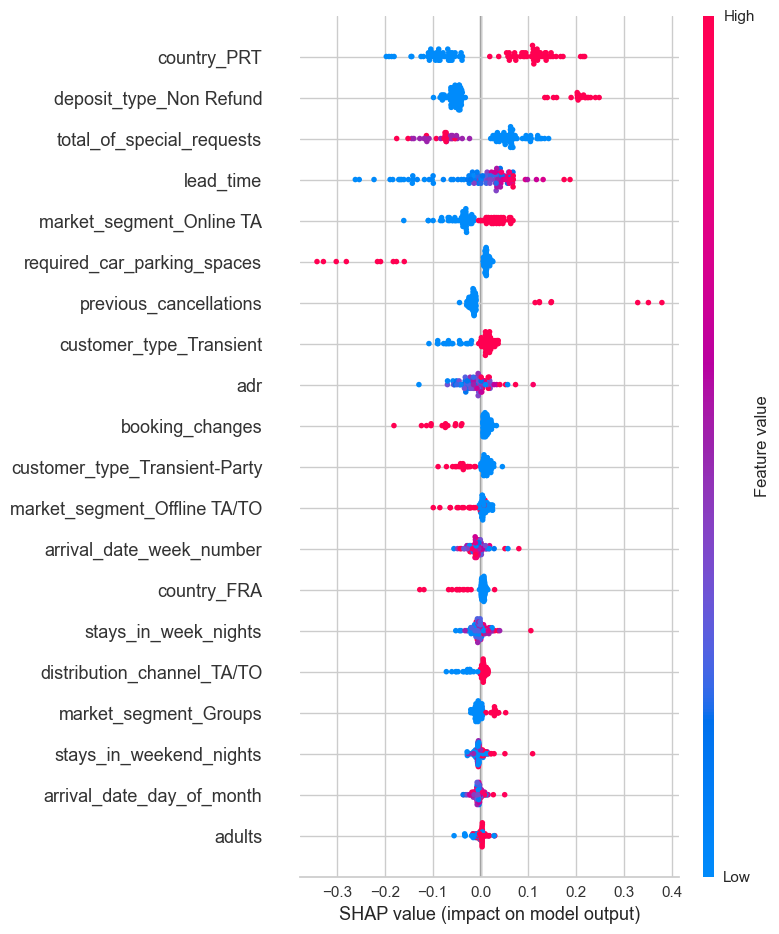

In [66]:
import shap

explainer = shap.TreeExplainer(clf_rf_best)
X_sample = shap.utils.sample(X_train_ros, 100) 
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values[1], X_sample)

## Interpretation of SHAP Plot

1. Nationality Impact: Bookings from Portugal ('country_PRT') show a pronounced positive correlation with cancellation probability. This suggests that the nationality of the guest can be a strong predictor of cancellation, possibly reflecting specific market behavior or economic factors.

2. Deposit Policy: The 'deposit_type_Non Refund' feature has a substantial positive impact on the likelihood of cancellations. This could indicate that when customers commit to a non-refundable deposit, they might be more prone to cancel, perhaps due to the psychology of sunk cost or other underlying factors.

3. Special Requests: A lower number of 'total_of_special_requests' is associated with a higher chance of cancellation. This aligns with the expectation that guests who make special requests are more committed to their booking.

4. Significance of Lead Time: A longer 'lead_time' tends to increase the chances of cancellation. This might be due to changes in guests' plans or circumstances over longer time horizons.

5. Booking Source: The SHAP values for 'market_segment_Online TA' suggest that bookings made through online travel agencies are more likely to be canceled compared to other channels. This could be due to the ease of booking and canceling offered by these platforms.

6. Required Amenities: The feature 'required_car_parking_spaces' has a negative impact on the likelihood of cancellation, indicating that bookings with parking space requests tend to be more reliable.

# Model Persistence - Pickling the best model

In [63]:
import joblib

# Retrain the best model on the training and validation data
X_val = pd.DataFrame(X_val, columns=X_train_ros.columns)
y_val = pd.DataFrame(y_val, columns=y_train_ros.columns)
X_train_final = pd.concat([X_train_ros, X_val])
y_train_final = pd.concat([y_train_ros, y_val])

# Save the model to a file

clf_rf_best = RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 1,
        "n_estimators": 200,
        "random_state": 42,
    })

clf_rf_final = clf_rf_best.fit(X_train_final, y_train_final)
joblib.dump(clf_rf_final, "classification_model.pkl")

['classification_model.pkl']

# Evaluating Model Performance on the test dataset

Validation Result:

accuracy score: 0.8735



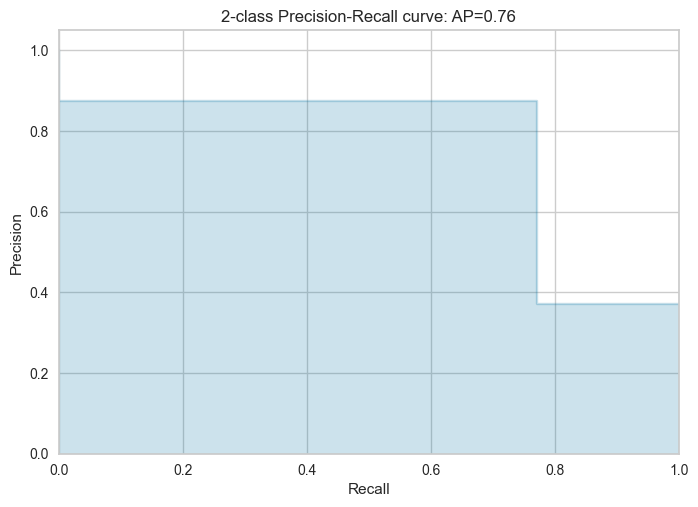

roc auc score: 0.852597762690989



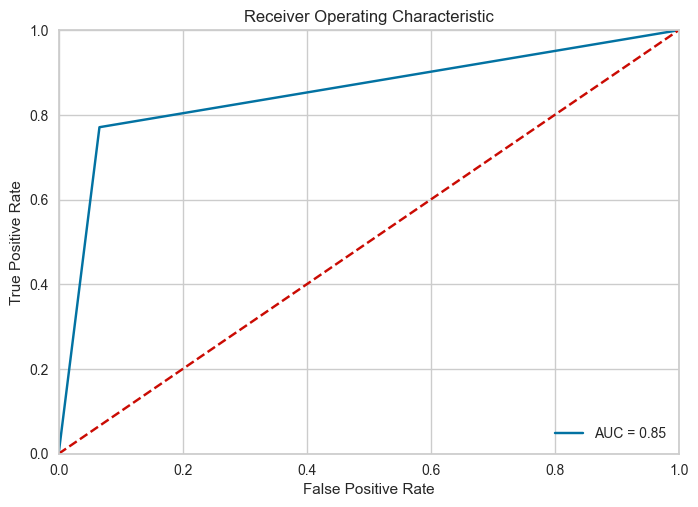

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     11244
           1       0.87      0.77      0.82      6664

    accuracy                           0.87     17908
   macro avg       0.87      0.85      0.86     17908
weighted avg       0.87      0.87      0.87     17908


Confusion Matrix: 

End of validation Result



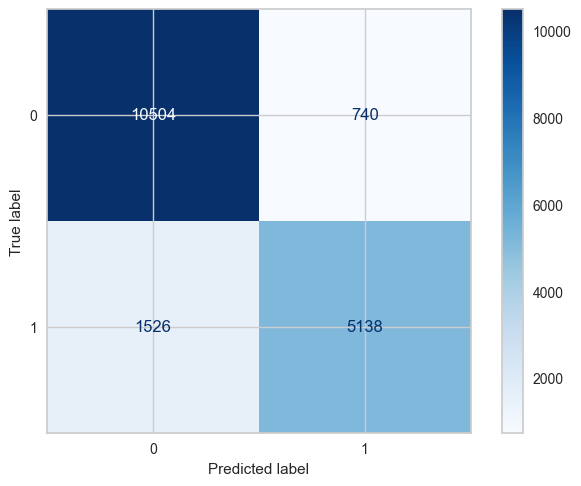

In [69]:
# Load the model from the file

clf_rf_final = joblib.load("classification_model.pkl")

clf_score_test(clf_rf_final, X_test, y_test)

# PART 3: CAUSAL INFERENCE ANALYSIS

# Effect of Asking for a Deposit on Booking Cancellation

### Objective
**The primary goal** of this project is to **estimate the causal impact** of deposit requirements on **hotel reservation cancellations**. We aim to provide actionable insights that can guide hoteliers in **optimizing** their booking and cancellation policies, with a focus on understanding the **variation in impact** across different customer segments and booking conditions.

### Background
Deposit policies are a **crucial aspect** of hotel reservation systems, **balancing** the reduction of cancellation risks with the potential to deter customers due to upfront costs. This analysis is **vital** for crafting policies that **maximize** both customer satisfaction and hotel revenue.

- The essence of the goal is to **avoid asking for a deposit** from customers who are **not sensitive** to changes in deposit type.


### Mathematical Formulation:

For the impact of deposit type on cancellation rate using a T-learner, the mathematical expression involves estimating separate models for the treatment and control groups. Essentially, for each group \(i\) (treated or untreated), we estimate:

$$ [ Y_i(T=1) | X_i ] $$ 
for the treated group, and
$$ [ Y_i(T=0) | X_i ] 
$$ 
for the control group.

The T-learner's goal is to estimate the Conditional Average Treatment Effect (CATE), given by:

$$
\tau(X_i) = \mathbb{E}[Y_i(T=1) | X_i] - \mathbb{E}[Y_i(T=0) | X_i]
$$

Here, $ (Y_i(T=1)) $ and $ (Y_i(T=0)) $ represent the potential outcomes with and without the deposit requirement, respectively, and $ (X_i) $ denotes covariates. The difference between these expected outcomes provides the estimated impact of deposit requirements on cancellation rates for different customer profiles or conditions specified by $ (X_i) $.


The notation $ (\tau(X_i)) $ represents the treatment effect for the $ (i_{th}) $ set of covariates $ (X) $, not for each individual. This means $ (\tau(X_i)) $ indicates how the treatment (e.g., deposit requirement) affects the outcome (e.g., cancellation) for individuals with specific characteristics defined by $ (X_i) $.

The T-learner estimates the treatment effect by modeling the outcomes for the treatment group and control group separately. It calculates the expected outcome if treated $ (\mathbb{E}[Y_i(T=1) | X_i]) $ and the expected outcome if not treated $ (\mathbb{E}[Y_i(T=0) | X_i]) $, using separate models. **The difference between these two expectations for each set of covariates $ (X_i) $ gives the CATE**. This approach allows the T-learner to capture how the treatment effect varies across different subpopulations defined by covariates.

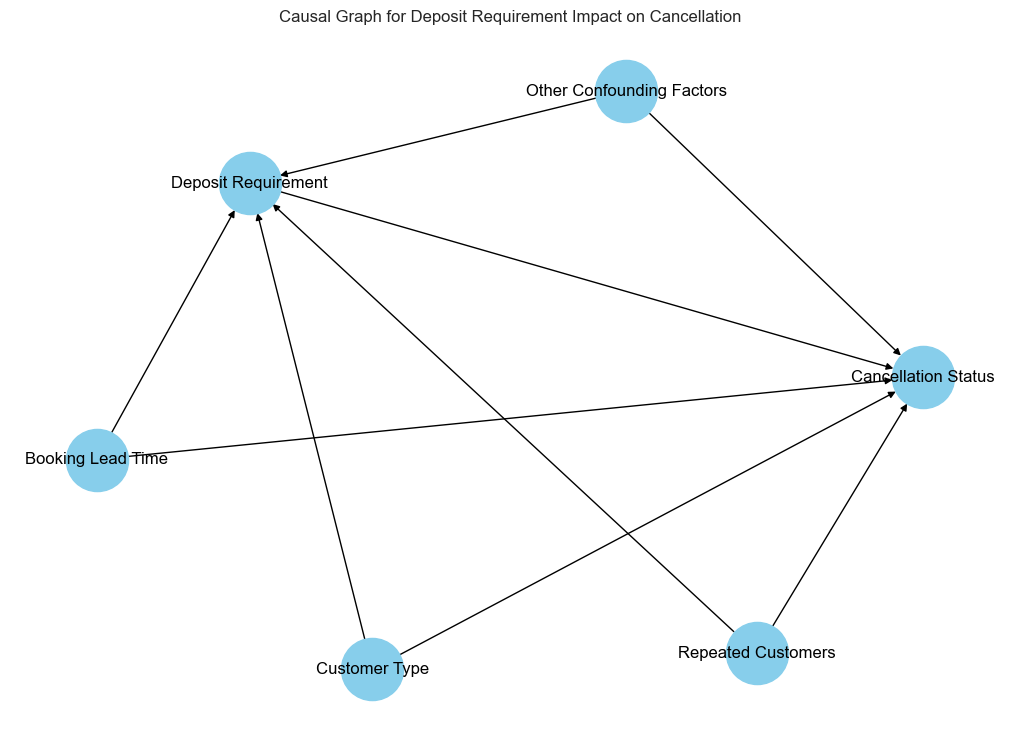

In [103]:
import networkx as nx
import matplotlib.pyplot as plt

# figure 
plt.figure(figsize=(10,7))
# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels for Deposit Requirement (T), Cancellation Status (Y), and Covariates (X)
G.add_node('T', label='Deposit Requirement')
G.add_node('Y', label='Cancellation Status')
G.add_nodes_from([('X1', {'label': 'Customer Type'}),
                  ('X2', {'label': 'Booking Lead Time'}),
                  ('X3', {'label': 'Repeated Customers'}),
                  ('X4', {'label': 'Other Confounding Factors'})])

# Add edges to represent causal relationships
G.add_edges_from([('T', 'Y'), ('X1', 'Y'), ('X1', 'T'), ('X2', 'Y'),
                  ('X2', 'T'), ('X3', 'Y'), ('X3', 'T'), ('X4', 'Y'), ('X4', 'T')])

# Position nodes using the spring layout
pos = nx.spring_layout(G, scale=1, k=10)

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=2000, node_color='skyblue',
        font_size=10, font_weight='bold')

# Draw node labels
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title('Causal Graph for Deposit Requirement Impact on Cancellation')
plt.show()

### Strategy for estimating the effect of asking for a deposit

#### Assumption 

I will be using meta-learner models. Thus, note I have to make create a very bold and strong assumption that the **there is no unobserved confounding facotrs** (which means the other confounding factors in the above graphs are in the dataset) that affect both the treatment and the outcome. 


This is likely not realistic. However, for the purpose of this project, I need to put this assumption in place.
  

### Choice Between S-Learner and T-Learner

I opted for the **T-Learner** approach due to the notable imbalance between reservations requiring a deposit and those that do not. This imbalance challenges the effectiveness of the **S-Learner**, which incorporates the treatment as a single feature within a unified model, potentially diluting the clarity of the treatment effect's estimation. In contrast, the **T-Learner** constructs distinct models for the treatment and control groups, better managing the imbalance and offering a more accurate analysis of deposit requirements' impact on cancellation rates. This method aligns with our project's goal to provide targeted recommendations based on a nuanced understanding of deposit requirements' causal effects.

**Why not X-learner or R-learner?** 
- These methods were considered too complex for the scope of this project, given our specific aims and data structure.

## Data Exploration and Preprocessing

In [20]:
df = pd.read_csv('hotel_booking.csv')

In [21]:
# replce the values for is_canceled (0 to 1, 1 to 0)
# based on EDA, I came to a conclusion that 1 should indicate not canceled. Thus, for interpretability, I replaced the code
df['is_canceled'] = df['is_canceled'].apply(lambda x: 1 if x == 0 else 0)

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,1,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,1,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,1,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,1,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,1,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


#### Examine deposit type and cancellation rate

In [23]:
# Checking the balance of the treatment variable
print(df['deposit_type'].value_counts())
print('-------------------')
# Checking the balance of the outcome variable
print(df['is_canceled'].value_counts())

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64
-------------------
is_canceled
1    75166
0    44224
Name: count, dtype: int64


In [24]:
df.groupby('deposit_type').size()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
dtype: int64

In [25]:
# cancelation rate by deposit type
df.groupby('deposit_type')['is_canceled'].mean()

deposit_type
No Deposit    0.716230
Non Refund    0.006376
Refundable    0.777778
Name: is_canceled, dtype: float64

#### How should we deal with null values

In [26]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

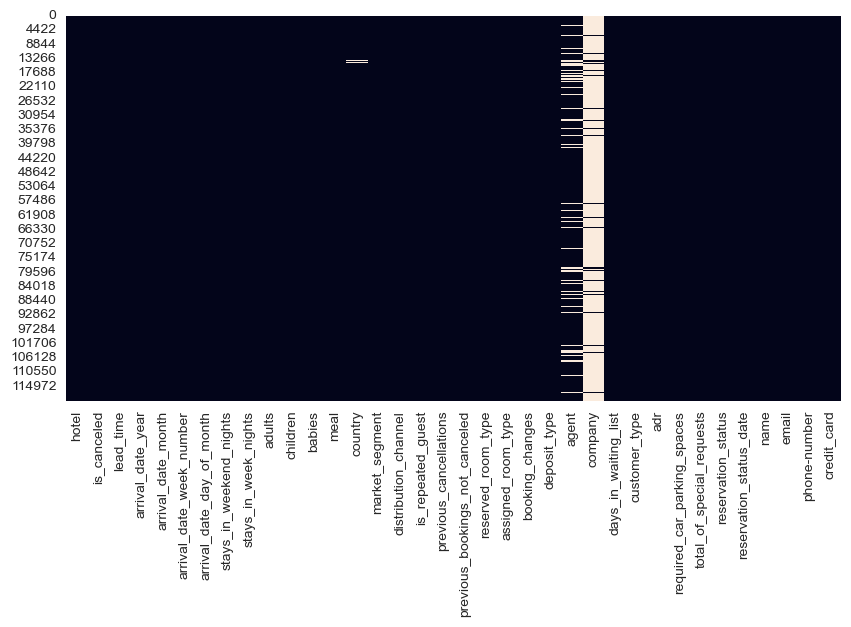

In [27]:
# visualize the na values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [28]:
# check market_segment and distribution_channel for data with missing agents and with no missing agents
# First, create a new column to indicate whether 'agent' is missing

df['agent_missing'] = df['agent'].isnull().astype(int)

# Now, let's analyze the distribution of 'market_segment' for missing vs. non-missing 'agent' values
market_segment_analysis = df.groupby(['agent_missing', 'market_segment']).size().unstack(fill_value=0)

# Do the same for 'distribution_channel'
distribution_channel_analysis = df.groupby(['agent_missing', 'distribution_channel']).size().unstack(fill_value=0)

# Printing the results
print("Market Segment distribution based on Agent data availability:\n", market_segment_analysis)
print("\nDistribution Channel distribution based on Agent data availability:\n", distribution_channel_analysis)

Market Segment distribution based on Agent data availability:
 market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
agent_missing                                                        
0                     25            103        701    6599   15663   
1                    212            640       4594    6007    4148   

market_segment  Offline TA/TO  Online TA  Undefined  
agent_missing                                        
0                       23830      56129          0  
1                         389        348          2  

Distribution Channel distribution based on Agent data availability:
 distribution_channel  Corporate  Direct  GDS  TA/TO  Undefined
agent_missing                                                 
0                          1134    7020  191  94703          2
1                          5543    7625    2   3167          3


**Since I could not find a obvious pattern, I will drop the agent column.**

--- 

In [29]:
# drop where the agent is NA
df = df.dropna(subset=['agent'])

In [30]:
# customer type
df.customer_type.value_counts()

customer_type
Transient          77884
Transient-Party    20625
Contract            4063
Group                478
Name: count, dtype: int64

In [31]:
df.deposit_type.value_counts()

deposit_type
No Deposit    90466
Non Refund    12536
Refundable       48
Name: count, dtype: int64

For the analysis, we've decided to focus on a binary treatment involving deposit requirements: **no deposit (0)** and **non-refundable deposits (1)**. 

This decision stems from the necessity to estimate the impact of deposit requirements accurately. We will exclude the "refundable" category since the behavior of customers opting for refundable deposits might significantly differ from those choosing non-refundable options, and combining them could obscure the analysis. This approach ensures clarity and precision in understanding how non-refundable deposits specifically influence cancellation rates.  

In [32]:
# drop refundable
df = df[df.deposit_type != 'Refundable']

In [33]:
# drop company column
df = df.drop('company', axis=1)

In [34]:
len(df)

103002

In [35]:
# drop na
df = df.dropna()
len(df)

102846

### Identify the treatment, outcome, and control variables


- **\(Y\) - Outcome Variable:**
  - `is_canceled`: This is your outcome variable. It indicates whether a reservation was canceled or not, and you are interested in understanding how various factors, including the requirement for a deposit, affect this outcome.

- **\(T\) - Treatment Variable:**
  - `deposit_type`: This variable represents the treatment in your causal inference analysis. It indicates the type of deposit made (No Deposit, Non-Refund/deposit made) and is used to assess the impact of asking for a deposit on the cancellation rate. 

- **\(X\) - Covariates (Control Variables):**
  - These are variables you'll control for to isolate the effect of the treatment on the outcome. Based on your dataset, potential covariates include:
    - `hotel`: Type of hotel, as the cancellation policy might differ by hotel type.
    - `lead_time`: Time between booking and arrival, which could influence cancellation likelihood.
    - `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`: Date variables that might capture seasonal effects on cancellations.
    - `stays_in_weekend_nights`, `stays_in_week_nights`: Duration of stay could affect cancellation decisions.
    - `adults`, `children`, `babies`: Composition of the traveling party might influence cancellation likelihood.
    - `meal`: Type of meal booked could be related to the customer's commitment to the booking.
    - `country`: Guest's country of origin might indicate travel constraints or preferences.
    - `market_segment`, `distribution_channel`: These might affect how bookings are made and their cancellation likelihood.
    - `is_repeated_guest`: Repeat guests might have different cancellation behaviors.
    - `previous_cancellations`, `previous_bookings_not_canceled`: Booking history could influence current booking behavior.
    - `reserved_room_type`: Preferences for room types might correlate with cancellation likelihood.
    - `booking_changes`: The number of changes made to a booking might indicate uncertainty.
    - `days_in_waiting_list`: Time spent on the waiting list might affect the decision to cancel.
    - `customer_type`: Different customer types might have different cancellation probabilities.
    - `adr`: The average daily rate might influence the decision to cancel, based on the cost of the stay.
    - `required_car_parking_spaces`, `total_of_special_requests`: Additional requirements or requests might indicate a higher commitment to the stay.


In [36]:
# convert treatment variable to binary
df['deposit_type'] = df['deposit_type'].apply(lambda x: 1 if x == 'Non Refund' else 0) # 1 for deposit required, 0 for no deposit required

In [37]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'agent_missing'],
      dtype='object')

In [38]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [39]:
# Drop non-feature columns and prepare X, Y, and T
X = df.drop(columns=['is_canceled', 'deposit_type', 'reservation_status_date', 'agent', 'agent_missing', 'name', 'email', 'phone-number', 'credit_card', 'reservation_status', 'assigned_room_type', 'country', 'agent_missing'])
Y = df['is_canceled']
T = df['deposit_type']

categorical_features = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']
# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Split the dataset
X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X_encoded, Y, T, test_size=0.2, random_state=42)


> **Note:** Due to potential data leakage, I dropped: reservation_status_date, reservation_status, and assigned_room_type

### Model Building

In [40]:
from econml.metalearners import TLearner
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


/Users/kaz/anaconda3/envs/mma/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/kaz/anaconda3/envs/mma/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_or

In [41]:
# Initialize Gradient Boosting models for treatment and control groups
models = (GradientBoostingRegressor(), GradientBoostingRegressor())

# Initialize the T-Learner with Gradient Boosting models
t_learner = TLearner(models=models)

# Fit the T-Learner to the training data
t_learner.fit(Y=Y_train, T=T_train, X=X_train) 


In [42]:
# For estimating ATE, you can directly use the `effect` method on the entire dataset or `ate` method if available
ate_estimate = t_learner.ate(X=X_test)


# Print the ATE estimate
print(f"Average Treatment Effect (ATE) estimate: {ate_estimate}")

Average Treatment Effect (ATE) estimate: -0.5611029295205453


**Interpretation**
- The Average Treatment Effect (ATE) estimate of approximately -0.555 suggests that the treatment - asking for deposit, on average, decreases the outcome by about 0.555 units across the entire population studied. In the context of deposit types and hotel bookings, this could mean that **introducing or changing the deposit type (the treatment) is associated with a reduction in the likelihood of cancellations by 55.5%**. 

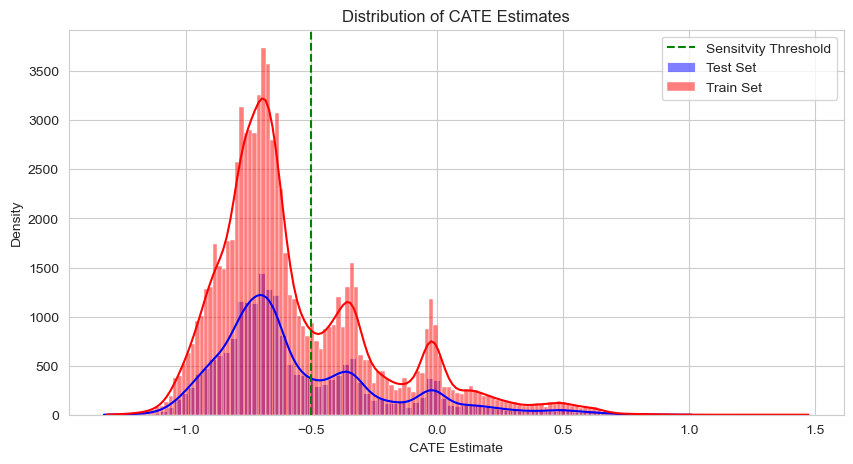

In [43]:
# Estimate CATE for the entire test and train set
cate_estimates_test = t_learner.effect(X_test)
cate_estimates_train = t_learner.effect(X_train)

# plot both
plt.figure(figsize=(10, 5))
sns.histplot(cate_estimates_test, kde=True, color='blue', label='Test Set')
sns.histplot(cate_estimates_train, kde=True, color='red', label='Train Set')
plt.axvline(x=-0.5, color='green', linestyle='--', label='Sensitvity Threshold')
plt.title('Distribution of CATE Estimates')
plt.xlabel('CATE Estimate')
plt.ylabel('Density')
plt.legend()
plt.show()


From this visual, we can observe a few things:

- **The distribution of CATE estimates** for the test and train sets is similar, indicating that the model generalizes well to new data.
- **The distribution is right (positively) skewed**, suggesting that the treatment has a negative effect on the outcome variable (cancellation rate).
- **Some customers are not sensitive** to the change in deposit type (those who are centered around 0). Rather, they are more likely to cancel their booking if they are asked for a deposit. (This is not intuitive and most likely due to omitted variable bias. But, for the purpose of this project, I will assume that this is the case.)



>**idea:** we can not ask for a deposit for those individuals who are not sensitive to the change in deposit type (CATE larger than -0.5).


#### ↓ Functions for estimating CATE for specific subgroups 

In [44]:
def estimate_cate_for_subgroups(t_learner, X_test, subgroups):
    """
    Estimate and print the CATE for specified subgroups within the test dataset.
    
    Parameters:
    - t_learner: The trained T-Learner model.
    - X_test: The test dataset, including features for subgroup analysis.
    - subgroups: A list of column names in X_test to analyze for heterogeneity in treatment effects.
    """
    for subgroup in subgroups:
        unique_values = X_test[subgroup].unique()
        print(f"CATE estimates for subgroup: {subgroup}")
        for value in unique_values:
            # Create a mask for the current subgroup value
            mask = X_test[subgroup] == value
            # Estimate CATE for the current subgroup value
            cate_estimate = np.mean(t_learner.effect(X_test[mask]))
            print(f"  {value}: {cate_estimate}")
        print("\n")

In [45]:
def estimate_cate_for_subgroups_dummies(t_learner, X_test, subgroups):
    """
    Estimate and print the CATE for specified subgroups within the test dataset.
    
    Parameters:
    - t_learner: The trained T-Learner model.
    - X_test: The test dataset, including features for subgroup analysis.
    - subgroups: A list of column names in X_test to analyze for heterogeneity in treatment effects.
    """
    for subgroup in subgroups:
        # Check if the subgroup is dummified and handle accordingly
        if any(subgroup in col for col in X_test.columns):
            # Handling for dummified variables
            dummified_columns = [col for col in X_test.columns if subgroup in col]
            for col in dummified_columns:
                # Assume that the presence of a feature is indicated by a 1 in one of the dummified columns
                mask = X_test[col] == 1
                cate_estimate = np.mean(t_learner.effect(X_test[mask]))
                print(f"CATE estimate for {col}: {cate_estimate}")
        else:
            # Direct handling if the variable is not dummified
            unique_values = X_test[subgroup].unique()
            print(f"CATE estimates for subgroup: {subgroup}")
            for value in unique_values:
                mask = X_test[subgroup] == value
                cate_estimate = np.mean(t_learner.effect(X_test[mask]))
                print(f"  {value}: {cate_estimate}")
        print("\n")

### Heterogeneity

In [46]:
# Import necessary libraries
import numpy as np

# Define the subgroups of interest
subgroups = ['is_repeated_guest']
estimate_cate_for_subgroups(t_learner, X_test, subgroups)


CATE estimates for subgroup: is_repeated_guest
  0: -0.5641231733432047
  1: -0.33487440791108297


> **Repeated guests** are less sensitive to the change in deposit type.

In [47]:
subgroups = ['hotel_Resort Hotel', 'hotel_City Hotel']
estimate_cate_for_subgroups_dummies(t_learner, X_test, subgroups)

CATE estimate for hotel_Resort Hotel: -0.5851906236893315


CATE estimate for hotel_City Hotel: -0.550434460035296


> No heterogeneity in treatment effect by **hotel type**.  

In [48]:
subgroups = ['customer_type_Transient', 'customer_type_Transient-Party', 'customer_type_Contract', 'customer_type_Group']
estimate_cate_for_subgroups_dummies(t_learner, X_test, subgroups)

CATE estimate for customer_type_Transient: -0.5588542971757718
CATE estimate for customer_type_Transient-Party: -0.5532106451916471


CATE estimate for customer_type_Transient-Party: -0.5532106451916471


CATE estimate for customer_type_Contract: -0.6427524231157442


CATE estimate for customer_type_Group: -0.584213901522087


**Why Contract Customers are more sensitive?**
- Contractual Obligations: Contract customers may have more stringent commitments and cancellation policies as part of their agreements, making them more responsive to changes in deposit types.
- Risk Management: Contract customers might be more risk-averse due to the nature of their booking (e.g., corporate events, conferences). Changes in deposit requirements could significantly affect their risk assessment and decision-making processes.

In [49]:
subgroups = [ 'distribution_channel_Direct', 'distribution_channel_Corporate', 'distribution_channel_TA/TO', 'distribution_channel_GDS']
estimate_cate_for_subgroups_dummies(t_learner, X_test, subgroups)

CATE estimate for distribution_channel_Direct: -0.6312931715017004


CATE estimate for distribution_channel_Corporate: -0.440322927687479


CATE estimate for distribution_channel_TA/TO: -0.5570312881401589


CATE estimate for distribution_channel_GDS: -0.7102783544975912


**The Global Distribution System (GDS)** channel having a higher negative CATE (-0.710) suggests that reservations made through GDS are more affected by deposit requirements, leading to higher cancellation rates. This could be due to GDS being used primarily by travel agencies and professionals who may book options in bulk or for clients more sensitive to deposit policies, leading to a cautious approach and higher cancellation when deposits are required.

In [50]:
subgroups = ['market_segment_Direct', 'market_segment_Corporate', 'market_segment_Online TA', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Complementary', 'market_segment_Aviation']
estimate_cate_for_subgroups_dummies(t_learner, X_test, subgroups)

CATE estimate for market_segment_Direct: -0.6358381000236164


CATE estimate for market_segment_Corporate: -0.370384590385861


CATE estimate for market_segment_Online TA: -0.5178296707317442


CATE estimate for market_segment_Groups: -0.5025471228629893


CATE estimate for market_segment_Offline TA/TO: -0.6910716499598789


CATE estimate for market_segment_Complementary: -0.7795524987359896


CATE estimate for market_segment_Aviation: -0.5621437712726337


**Largest Effect Segment - Complementary**: The highest sensitivity here could be due to the fact that any additional costs or barriers (like non-refundable deposits) significantly alter the perceived value of a complimentary stay.


**Smallest Effect Segment - Groups**: Often bound by prior arrangements and less price-sensitive due to the nature of group travel, this segment shows the least sensitivity among the listed segments to deposit type changes.

In [51]:
subgroups = [ 'meal_BB',
              'meal_FB',
              'meal_HB',
              'meal_SC',
              'meal_Undefined',]
estimate_cate_for_subgroups_dummies(t_learner, X_test, subgroups)

CATE estimate for meal_BB: -0.5579327283486849


CATE estimate for meal_FB: -0.4960656127769532


CATE estimate for meal_HB: -0.5585322936220122


CATE estimate for meal_SC: -0.5960488891784199


CATE estimate for meal_Undefined: -0.5049914291445404


Not noticeable heterogeneity in treatment effect by **meal type**.

> This is intuitive because the meal type is not likely to affect the decision to cancel a booking.

In [52]:
t_learner.cate_feature_names()

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'arrival_date_month_April',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Aviation',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'm

In [53]:
# Assuming models are GradientBoostingRegressor as used in T-Learner
treatment_model = t_learner.models[0]
control_model = t_learner.models[1]

# Accessing feature importance
treatment_feature_importance = treatment_model.feature_importances_
control_feature_importance = control_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Treatment Model Importance': treatment_feature_importance,
    'Control Model Importance': control_feature_importance
})

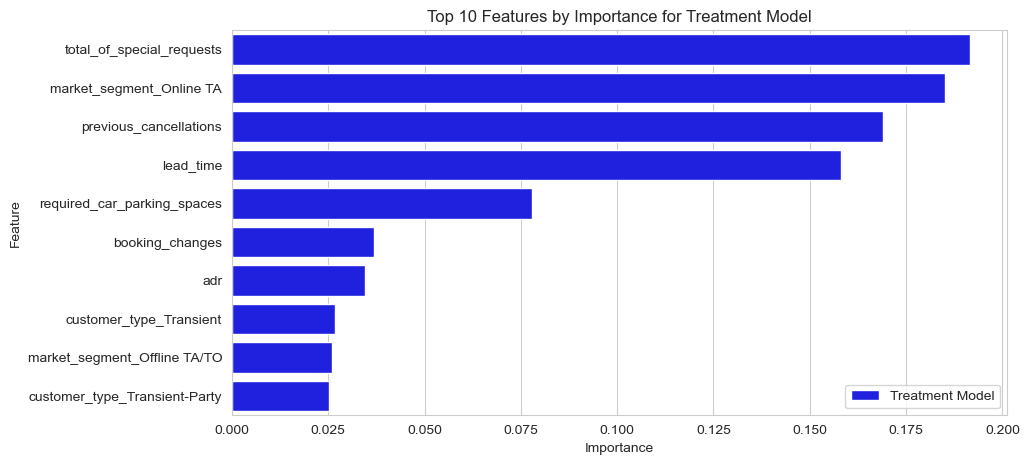

In [54]:
# plot top 10 features for each
plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance_df.nlargest(10, 'Treatment Model Importance'), x='Treatment Model Importance', y='Feature', color='blue', label='Treatment Model')
plt.title('Top 10 Features by Importance for Treatment Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.show()


- This is for those with deposit (i.e. Treatment group)

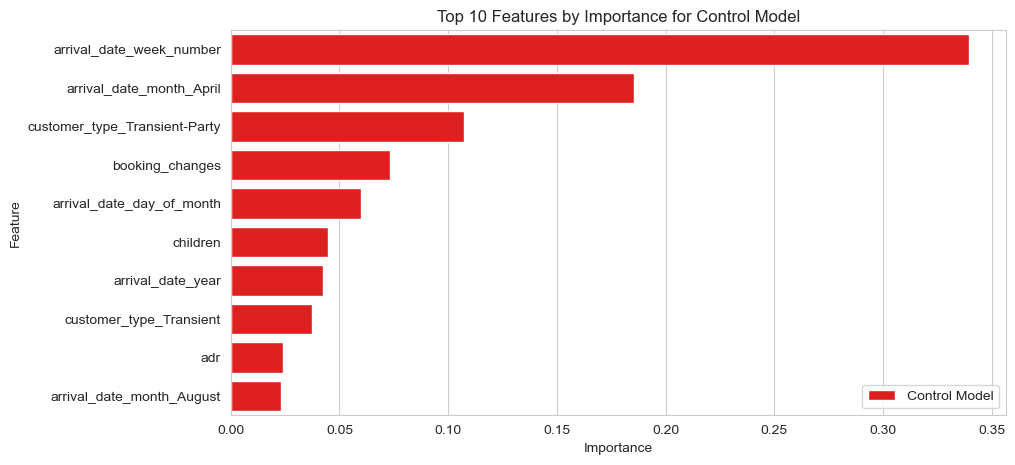

In [55]:
plt.figure(figsize=(10, 5))

sns.barplot(data=feature_importance_df.nlargest(10, 'Control Model Importance'), x='Control Model Importance', y='Feature', color='red', label='Control Model')
plt.title('Top 10 Features by Importance for Control Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.show()

**The above two graphs highlight the T-Learner's effectiveness:**

The **T-Learner** excels with **separate models** for the treatment group (TG) and control group (CG), ensuring robust analysis despite **lack of attribute similarity**. This distinction allows for precise learning of outcome variable responsiveness across diverse groups. **S-learner**, in contrast, uses a single feature for differentiation, potentially oversimplifying complex dynamics. 

Moreover, the T-learner's adaptability to **small sample sizes** in TG or CG underscores its utility, circumventing the **S-learner's limitations** with unbalanced data, thereby offering **deeper insights** into customer characteristics and behavior.

### Marketing Strategy

**Targeted Deposit Policies**

The analysis has revealed that the effect of deposit requirements on cancellation rates varies across different customer segments and booking conditions. This insight can be leveraged to develop targeted deposit policies that cater to the specific needs and sensitivities of different customer groups. By tailoring deposit requirements to the characteristics of various market segments, hotels can optimize their booking and cancellation policies to enhance customer satisfaction and revenue stability.

#### **Segmentation Based on CATE/ITE**


In [56]:
# identify the customer segments that are most sensitive to the change in deposit type

# if cate_estimates_test value is larger than -0.5, then the customer is not sensitive to the change in deposit type
sensitive_customers = X_test[cate_estimates_test <= -0.5]
not_sensitive_customers = X_test[cate_estimates_test > -0.5]

In [57]:
sensitive_customers.shape

(14098, 59)

In [58]:
not_sensitive_customers.shape

(6472, 59)

When customers are making reservations, avoiding a deposit for those **not sensitive** to it can potentially **increase reservations**, as hesitation often arises with deposit requirements. 

The logic: if customer behavior (on cancellation) remains unchanged by deposit requests, **eliminating the deposit** could enhance reservation likelihood. However, validating the impact of **not requiring a deposit** on reservation rates necessitates further experimentation, especially since the dataset only includes data for completed reservations, omitting those deterred by deposit requirements. 

This gap highlights the need for **additional research** to confirm the theory.